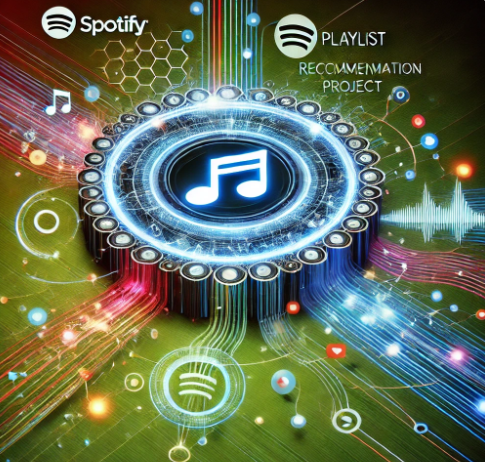

# ***Project Title: Building a Personalized Playlist Recommendation System with Spotify Data***

**Business Question**

"How can we develop a system to recommend personalized playlists to users, leveraging playlist data alone to identify contextual relationships between songs and generate relevant suggestions for a given input song?"

**Overview**

This project aims to answer the business question by analyzing and preprocessing Spotify playlist data to uncover patterns and relationships between songs. By leveraging the co-occurrence of tracks within user-created playlists, we can identify contextual similarities between songs and build a personalized recommendation system.

The dataset is a large collection of user playlists, which provides a unique opportunity to analyze song combinations and infer meaningful relationships without requiring additional metadata such as user preferences or song audio features.

**Objective**

The primary goal is to prepare and process the dataset to create a foundation for building a playlist recommendation system using techniques like Word2Vec and other Natural Language Processing (NLP) methods.
This involves extracting meaningful insights from playlist data alone and ensuring the dataset is clean, consistent, and ready for embedding generation.

**Dataset Features**
The Spotify dataset contains the following key attributes:

user_id: A unique identifier for the user who created the playlist.

artistname: The artist of the track.

trackname: The title of the track.

playlistname: The name of the playlist where the track appears.

**Challenges**

Large Dataset Size:

The dataset consists of over 12.7 million rows, making processing and analysis computationally intensive.

Missing Values:

Some records contain missing values in critical columns like artistname, trackname, or playlistname.

Inconsistent Data:

Variability in formatting, such as mixed-case text, special characters, and duplicates.

Outliers:

Playlists with an unusually large number of tracks can skew analysis and distort relationships.

**EDA and Preprocessing Plan**

Exploratory Data Analysis (EDA)
The focus areas of EDA include:

Playlist Length Analysis:

Understand the distribution of playlist sizes and identify outliers.
Group playlists by the number of tracks to observe user behavior patterns.

User Activity:

Analyze the number of playlists per user and the number of unique tracks contributed by each user.

Top Artists and Tracks:

Identify the most frequently occurring artists and tracks in the dataset.

Data Quality Check:

Inspect for missing values, duplicates, and irregularities in text formatting (e.g., special characters).

**Preprocessing Steps**

Handle Missing Values:

Drop or fill null values in critical columns (artistname, trackname, playlistname).

Example: Replace missing artist or track names with placeholders like "unknown_artist".

Normalize Text:

Convert all text to lowercase for consistency.

Remove leading/trailing spaces and special characters.

Handle special letters using normalization (e.g., "Mötley Crüe" → "motley crue").

Remove Duplicates:

Eliminate duplicate rows to improve data quality.

Analyze and Cap Playlist Lengths:

Cap excessively long playlists (e.g., more than 500 tracks) or remove outliers entirely to maintain balance.

Tokenize Playlists:

Transform playlists into tokenized sequences of tracks, which will serve as input for the recommendation model.

Generate Playlist Statistics:

Calculate metrics like average playlist length, unique tracks per playlist, and user contribution to further refine data insights.

**Approach to Recommendation System**

The recommendation system will utilize Word2Vec embeddings to map songs into a high-dimensional space based on their co-occurrence within playlists. Key steps include:

Input Preparation:

Tokenize playlists into sequences of track names.
Train a Word2Vec model to generate vector embeddings for each track.

Similarity Calculation:
Use cosine similarity between track embeddings to identify similar songs for recommendations.

Output:

For a given input song, recommend a set of tracks that frequently co-occur with it in playlists.

**Expected Outcome**

A cleaned and processed dataset ready for Word2Vec embedding generation.

Insights into playlist patterns, user behavior, and popular tracks/artists.

A proof-of-concept recommendation system that suggests personalized playlists or songs based solely on playlist data.

# Recognizing and Handling bad lines (expected 4 elements separated by comas and got different number of elements)

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-'

# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'spotify_dataset.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

# Load the CSV into a DataFrame
df_original = pd.read_csv(output_csv_path)

# Display the first few rows
df_original.head()


Downloading...
From (original): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-
From (redirected): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-&confirm=t&uuid=a11e48dd-75f2-4869-b29f-77b4db486db9
To: /content/spotify_dataset.csv
100%|██████████| 1.18G/1.18G [00:11<00:00, 101MB/s] 


ParserError: Error tokenizing data. C error: Expected 4 fields in line 14735, saw 5


Can't open the direct link because of bad lines in the dataset, lets check malformed rows:

In [ ]:
with open(output_csv_path, 'r') as file, open('malformed_rows.csv', 'w') as malformed_file:
    for i, line in enumerate(file):
        if len(line.split(',')) != 4:  # Expected number of columns
            malformed_file.write(f"Line {i + 1}: {line}")


Expected 4 elements (=4 columns: user id, artistname, trackname, playlist) and got different result, meaning we need to put a quotechar = ' " ', that will recognize an element as one and not more than that because an element comes with brackets because it's a string.

# Direct link to the Spotify_playlist.csv dataset (no need to download)

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-'

# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'spotify_dataset.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

# Load the CSV with proper handling of quoted fields
df_original = pd.read_csv(output_csv_path, quotechar='"',escapechar='\\', on_bad_lines='skip') # Some elements in one row have more than 4 elements (meaning 4 columns) because some track names (for example) contain comas
#so we implement a quotechasr='"' so a song will be read as one element.

# Display the first few rows
df_original.head()


Downloading...
From (original): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-
From (redirected): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-&confirm=t&uuid=aa206aaa-6b00-4b7d-ae86-aeabbf5ebbea
To: /content/spotify_dataset.csv
100%|██████████| 1.18G/1.18G [00:22<00:00, 52.3MB/s]


user_id                      "artistname"  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                         "trackname"  "playlistname"  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010

# Preliminary EDA (df=data frame)

escapechar handles the backslash \

quotechar handles the coma inside a string ""

In [ ]:
import gdown
import pandas as pd

# Direct link to your Google Drive file
file_id = '189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file to a local path
output_csv_path = 'spotify_dataset.csv'
gdown.download(download_url, output_csv_path, quiet=False)

# Load the CSV with pandas
df = pd.read_csv(output_csv_path, quotechar='"',escapechar='\\', keep_default_na=True, on_bad_lines='warn')
print(df.head())

Streaming output truncated to the last 5000 lines.
Skipping line 6258854: expected 4 fields, saw 5
Skipping line 6258856: expected 4 fields, saw 6
Skipping line 6258858: expected 4 fields, saw 5
Skipping line 6258861: expected 4 fields, saw 5
Skipping line 6258863: expected 4 fields, saw 5
Skipping line 6258870: expected 4 fields, saw 5
Skipping line 6258873: expected 4 fields, saw 5
Skipping line 6258874: expected 4 fields, saw 5
Skipping line 6258875: expected 4 fields, saw 5
Skipping line 6258878: expected 4 fields, saw 5
Skipping line 6258879: expected 4 fields, saw 5
Skipping line 6259203: expected 4 fields, saw 5
Skipping line 6272218: expected 4 fields, saw 5
Skipping line 6273536: expected 4 fields, saw 5
Skipping line 6273560: expected 4 fields, saw 5
Skipping line 6274127: expected 4 fields, saw 5
Skipping line 6274855: expected 4 fields, saw 5
Skipping line 6280493: expected 4 fields, saw 7
Skipping line 6284775: expected 4 fields, saw 5
Skipping line 6284802: expected 4 fie

                            user_id                      "artistname"  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                         "trackname"  "playlistname"  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010  


How many rows in the malformed rows, have less than 4 elements : (answer is 0)

In [ ]:
# Define the file path
file_path = 'spotify_dataset.csv'  # Update with your actual file path

# Open the file and check for malformed rows
malformed_rows = []
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        # Split the row by the delimiter and count elements
        if len(line.split(',')) < 4:  # Adjust '4' to the expected number of columns
            malformed_rows.append((i + 1, line))  # Store the line number and content

# Display malformed rows
print(f"Number of malformed rows: {len(malformed_rows)}")
for line_number, content in malformed_rows[:10]:  # Show the first 10 malformed rows
    print(f"Line {line_number}: {content}")


Number of malformed rows: 0


In [ ]:

# Display basic information
df_original.info()

# Show the first few rows
df_original.head()

# Check for missing values
df_original.isnull().sum()

# Analyze unique values in columns
df_original.nunique()

# Describe the dataset
df_original.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB


user_id  "artistname"  "trackname"  \
count                           12891680      12858108     12891592   
unique                             15918        289820      2032043   
top     4398de6902abde3351347b048fcdc287     Daft Punk        Intro   
freq                              295275         36086         6676   

        "playlistname"  
count         12890434  
unique          157504  
top            Starred  
freq           1337085

In [ ]:
# Display basic information
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB


dataset has successfully loaded with 12,891,680 rows and 4 columns, but the column names have extra quotes (e.g., "artistname", "trackname", "playlistname"), which might cause issues during analysis.

In [ ]:
df.columns = df.columns.str.strip().str.replace('"', '')
print(df.columns)

Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')


In [ ]:
# Show the first few rows
df_original.head()

user_id                      "artistname"  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                         "trackname"  "playlistname"  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010

In [ ]:
# Check for missing values
df_original.isnull().sum()


user_id                0
 "artistname"      33572
 "trackname"          88
 "playlistname"     1246
dtype: int64

In [ ]:
# Analyze unique values in columns
df_original.nunique()

user_id              15918
 "artistname"       289820
 "trackname"       2032043
 "playlistname"     157504
dtype: int64

In [ ]:
# Describe the dataset
df_original.describe(include='all')

user_id  "artistname"  "trackname"  \
count                           12891680      12858108     12891592   
unique                             15918        289820      2032043   
top     4398de6902abde3351347b048fcdc287     Daft Punk        Intro   
freq                              295275         36086         6676   

        "playlistname"  
count         12890434  
unique          157504  
top            Starred  
freq           1337085

In [ ]:
print(df[df['"artistname"'].str.contains(r'\\', na=False)])  # Rows with backslash in artistname
print(df[df['"trackname"'].str.contains(r'\\', na=False)])  # Rows with backslash in trackname
print(df[df['"playlistname"'].str.contains(r'\\', na=False)])  # Rows with backslash in playlistname


KeyError: '"artistname"'

#EDA- extensive - i need to devide into blocks for better understanding but it is based on all knowledge i got from initial EDA i did.

In [ ]:
import pandas as pd

# Step 1: Load the CSV with `quotechar='"'`
df_original = pd.read_csv('spotify_dataset.csv', quotechar='"', on_bad_lines='skip')
df_original.to_csv('step1_loaded.csv', index=False)
print("Step 1 saved: step1_loaded.csv")

# Step 2: Clean column names
df_original.columns = df_original.columns.str.strip().str.replace('"', '')  # Remove quotes and spaces
df_original.to_csv('step2_cleaned_columns.csv', index=False)
print("Step 2 saved: step2_cleaned_columns.csv")

# Step 3: Handle missing values
df_original = df_original.dropna()  # Remove rows with missing values
# Optional: Fill missing values instead of dropping them
# df_original.fillna({'artistname': 'unknown', 'trackname': 'unknown', 'playlistname': 'unknown'}, inplace=True)
df_original.to_csv('step3_handled_missing.csv', index=False)
print("Step 3 saved: step3_handled_missing.csv")

# Step 4: Convert all string columns to lowercase
string_columns = df_original.select_dtypes(include='object').columns  # Identify string columns
df_original[string_columns] = df_original[string_columns].apply(lambda col: col.str.lower())
df_original.to_csv('step4_lowercase.csv', index=False)
print("Step 4 saved: step4_lowercase.csv")

# Step 5: Duplicate Rows
print(f"Number of duplicate rows: {df_original.duplicated().sum()}")
df_original = df_original.drop_duplicates()
df_original.to_csv('step5_removed_duplicates.csv', index=False)
print("Step 5 saved: step5_removed_duplicates.csv")

# Step 6: Distribution Analysis
print(df_original['artistname'].value_counts().head(10)) # Most Frequent Artists

print(df_original['trackname'].value_counts().head(10)) # Most Frequent Tracks

#Save these distributions for review:
df_original['artistname'].value_counts().head(10).to_csv('top10_artists.csv')
df_original['trackname'].value_counts().head(10).to_csv('top10_tracks.csv')

# Step 7: Playlist Diversity
playlist_diversity = df_original.groupby('playlistname')['trackname'].nunique()
playlist_diversity.to_csv('step7_playlist_diversity.csv')
print("Step 7 saved: step7_playlist_diversity.csv")

df_original['artistname'] = df_original['artistname'].str.strip()
df_original['trackname'] = df_original['trackname'].str.strip()
df_original['playlistname'] = df_original['playlistname'].str.strip()

# Step 8: Normalize or Standardize Text
#Remove extra spaces, special characters, or unusual formatting in text fields
df_original.to_csv('step8_normalized_text.csv', index=False)
print("Step 8 saved: step8_normalized_text.csv")

# Step 9: Check for Unusual Values
print(df_original[df_original['artistname'].str.len() < 2])  # Artists with very short names
print(df_original[df_original['trackname'].str.len() < 2])  # Tracks with very short names
print(df_original[df_original['playlistname'].str.len() < 2])  # Playlists with very short names

# filter these values out:
df_original = df_original[df_original['artistname'].str.len() >= 2]
df_original = df_original[df_original['trackname'].str.len() >= 2]
df_original = df_original[df_original['playlistname'].str.len() >= 2]

df_original.to_csv('step9_filtered_unusual_values.csv', index=False)
print("Step 9 saved: step9_filtered_unusual_values.csv")

# Step 10: Create Summary Statistics
summary = df_original.describe(include='all')
summary.to_csv('step10_summary_statistics.csv')
print("Step 10 saved: step10_summary_statistics.csv")

# Step 11:Identify Relationships
#Track Count per Artist
track_count_per_artist = df_original.groupby('artistname')['trackname'].nunique()
track_count_per_artist.to_csv('step11_track_count_per_artist.csv')
print("Step 11 saved: step11_track_count_per_artist.csv")

#Tracks per Playlist
tracks_per_playlist = df_original.groupby('playlistname')['trackname'].nunique()
tracks_per_playlist.to_csv('step11_tracks_per_playlist.csv')
print("Step 11 saved: step11_tracks_per_playlist.csv")

# Step 12: Save Cleaned and Processed Data
#Save Cleaned and Processed Data
df_original.to_csv('final_cleaned_dataset.csv', index=False)
print("Final dataset saved: final_cleaned_dataset.csv")






Step 1 saved: step1_loaded.csv
Step 2 saved: step2_cleaned_columns.csv
Step 3 saved: step3_handled_missing.csv
Step 4 saved: step4_lowercase.csv
Number of duplicate rows: 25183
Step 5 saved: step5_removed_duplicates.csv
artistname
daft punk             36049
coldplay              35521
radiohead             31454
the rolling stones    30746
kanye west            29112
jay z                 28966
eminem                28896
queen                 28010
david bowie           27790
michael jackson       26224
Name: count, dtype: int64
trackname
intro          6712
home           5607
closer         3551
runaway        3350
hold on        3282
radioactive    3188
forever        3067
stay           3006
alive          2940
wake me up     2838
Name: count, dtype: int64
Step 7 saved: step7_playlist_diversity.csv
Step 8 saved: step8_normalized_text.csv
                                   user_id artistname  \
14137     650c4d63a819dbb77cc15a87f407039a              
45135     db937456654d2465292c

# Direct link to final_cleaned_dataset.csv (file after EDA)

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1pw1rhn2FoRoFvdKdq1iSuX6hotUEtn-X'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'final_cleaned_dataset.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1pw1rhn2FoRoFvdKdq1iSuX6hotUEtn-X
From (redirected): https://drive.google.com/uc?export=download&id=1pw1rhn2FoRoFvdKdq1iSuX6hotUEtn-X&confirm=t&uuid=6d4d79e5-409a-4d97-8786-59cec9951b4b
To: /content/final_cleaned_dataset.csv
100%|██████████| 1.04G/1.04G [00:10<00:00, 97.3MB/s]


'final_cleaned_dataset.csv'

In [ ]:
import pandas as pd

# Load the final saved file
df_final = pd.read_csv('final_cleaned_dataset.csv')

# 1. Basic Information
print("Basic Information:")
print(df_final.info())

# 2. Shape of the Dataset
print("\nShape of the Dataset:")
print(f"Number of rows: {df_final.shape[0]}")
print(f"Number of columns: {df_final.shape[1]}")

# 3. Summary Statistics
print("\nSummary Statistics:")
print(df_final.describe(include='all'))  # Include all columns (numeric and categorical)

# 4. Column-Wise Null Check
print("\nMissing Values Per Column:")
print(df_final.isnull().sum())

# 5. Head and Tail (First and Last Rows)
print("\nFirst 5 Rows:")
print(df_final.head())

print("\nLast 5 Rows:")
print(df_final.tail())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743252 entries, 0 to 12743251
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 388.9+ MB
None

Shape of the Dataset:
Number of rows: 12743252
Number of columns: 4

Summary Statistics:
                                 user_id artistname trackname playlistname
count                           12743252   12743249  12743230     12743252
unique                             15864     276963   1841157       137880
top     4398de6902abde3351347b048fcdc287  daft punk     intro      starred
freq                              294834      35890      6704      1330532

Missing Values Per Column:
user_id          0
artistname       3
trackname       22
playlistname     0
dtype: int64

First 5 Rows:
                            user_id                       artistnam

In [ ]:
print(f"Shape after step X: {df_final.shape}")


Shape after step X: (12743252, 4)


# Preprocessing of the data

## Step 1: Handling missing values

From last analysis on final_cleaned_dataset.csv we see there are still missing values even after handling them in EDA:

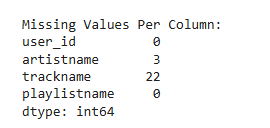

In [ ]:
# Display rows with missing values
missing_data = df_final[df_final.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_data)


Rows with missing values:
                                   user_id            artistname  \
621134    c4f7f2f76ffb91bc97d5d74cac0bb1bc           brunori sas   
691427    4b229cd34de420c309b4e54a07b52777           stoned baby   
795324    3025b16e8aca079113af72ef07cbf693           brunori sas   
1573529   e29513294cd6754142a2f1e1bb54975f        booker t jones   
1603298   4191cfd13e46e23647d408d812280aee              sonzeira   
2319046   8cb1e3faf1c1643c69d1f806cbcc5b1e                  ween   
2459362   853c7d22d041015dbc3b248194331e50         the algorithm   
3969056   a4f65b7929c00088b8bcba010363d375                  ween   
4718645   db61fa74dbd6b564ae115f42370163d6                benjie   
4737086   f82a1fe28c47aed215b6547fc55fab95         the algorithm   
4837169   932d18ffe570c999355cd5d7627ed375             bossa rio   
5099907   7494ee41e5d815b5f88b90e46e321057        booker t jones   
5765602   5debd9fcd3621c27d6200880bc3e187e  holographic dissolve   
6270819   fba23f128b62

Analysis of Missing Data
Missing artistname:

There are rows where artistname is missing but other columns (like trackname and playlistname) have valid data.
Action: You can fill these with a placeholder like "unknown_artist".
Missing trackname:

Rows with missing trackname lack critical information, as the track is essential for playlist analysis.
Action: These rows should ideally be dropped, as trackname is required for modeling.
playlistname:

There are no missing values in this column, so no action is required here.

In [ ]:
# Fill missing artist names with 'unknown_artist'
df_final['artistname'] = df_final['artistname'].fillna('unknown_artist')

# Drop rows with missing track names, as they lack essential information
df_final = df_final.dropna(subset=['trackname'])

# Verify that there are no missing values
print("Missing values after handling:")
print(df_final.isnull().sum())

# Save the cleaned dataset
df_final.to_csv('processed_data_missing_handled.csv', index=False)
print("Processed data with missing values handled saved: processed_data_missing_handled.csv")


Missing values after handling:
user_id         0
artistname      0
trackname       0
playlistname    0
dtype: int64
Processed data with missing values handled saved: processed_data_missing_handled.csv


Now there are no missing values.

Rows with missing artistname will have "unknown_artist" as a placeholder.

Rows with missing trackname will be dropped.

The dataset will be free of missing values, ready for further preprocessing or analysis.

## Step 2: Analysis of Cleaned Data (after handling all missing values)

In [ ]:
print(f"Shape after step X: {df_final.shape}")

Shape after step X: (12743230, 4)


In [ ]:
# Count the total occurrences of 'unknown_artist'
unknown_artist_count = df_final['artistname'].value_counts().get('unknown_artist', 0)

# Display the count
print(f"Total occurrences of 'unknown_artist': {unknown_artist_count}")


Total occurrences of 'unknown_artist': 3


## Step 3: Analyze Playlist Lengths

Use the number of tracks per playlist to understand distribution and identify outliers.


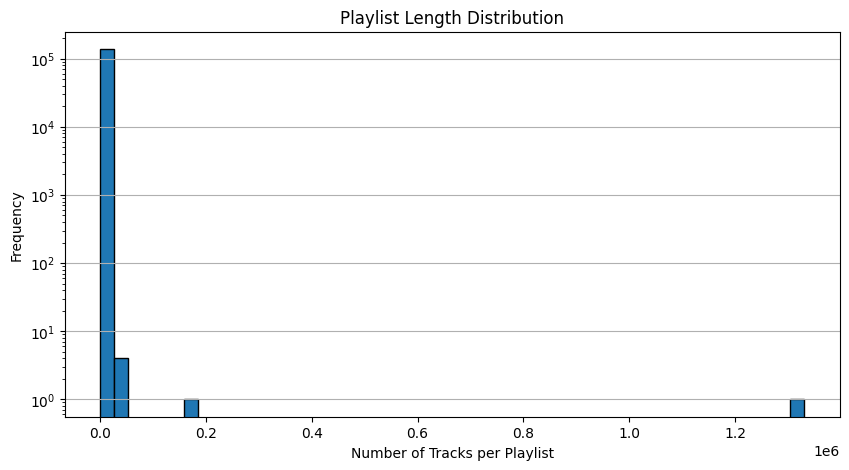

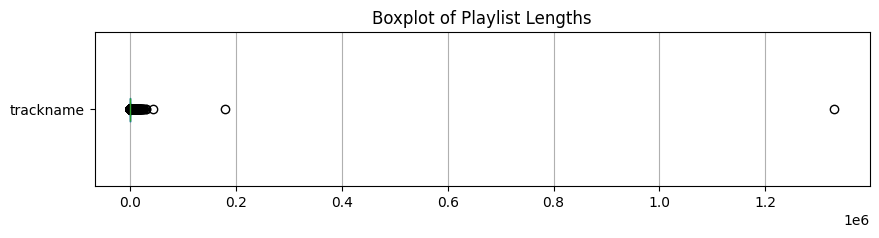

Playlist Length Statistics:
count    1.378800e+05
mean     9.242261e+01
std      3.642729e+03
min      1.000000e+00
25%      1.100000e+01
50%      2.100000e+01
75%      5.200000e+01
max      1.330529e+06
Name: trackname, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Calculate playlist lengths
playlist_lengths = df_final.groupby('playlistname')['trackname'].count()

# Save the playlist lengths for reference
playlist_lengths.to_csv('playlist_lengths.csv')

# Plot histogram for playlist lengths
plt.figure(figsize=(10, 5))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.title('Playlist Length Distribution')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
playlist_lengths.plot(kind='box', vert=False)
plt.title('Boxplot of Playlist Lengths')
plt.grid(axis='x')
plt.show()

# Basic statistics of playlist lengths
print("Playlist Length Statistics:")
print(playlist_lengths.describe())



Looking at the Playlist Length Statistics, here's what each metric tells us:

Key Metrics:

Count (count):

**Total number of playlists analyzed: 137,880.** This is the total number of **unique playlists** in the dataset.

Mean (mean):

Average number of tracks per playlist: ~92.42. On average, **playlists contain around 92 tracks.** This value is skewed upwards due to outliers (e.g., extremely long playlists).

Standard Deviation (std):

**Standard deviation is very large: ~3,642.73. This indicates that playlist lengths vary widely,** with some being extremely large (outliers).

Minimum (min):

**The smallest playlist has only 1 track.** This might indicate edge cases, such as test or private playlists.

25th Percentile (25%):

**25% of playlists have 11 or fewer tracks.** This suggests that a significant number of playlists are **relatively short.**

Median (50%):

The median playlist length is 21 tracks, meaning that half the playlists contain 21 tracks or fewer. This is a more realistic representation of typical playlist length compared to the mean.

75th Percentile (75%):

75% of playlists have 52 tracks or fewer. This suggests that most playlists are moderately sized, while only **a small proportion are large.**

Maximum (max):

**The largest playlist has 1,330,529 tracks! This is an extreme outlier** and likely represents an aggregated or error-prone playlist.

### The longest playlist is: starred, Number of unique songs in the longest playlist: 417336

In [ ]:
# Find the name of the longest playlist
longest_playlist_name = df_final.groupby('playlistname')['trackname'].count().idxmax()

# Filter the longest playlist
longest_playlist = df_final[df_final['playlistname'] == longest_playlist_name]

# Count unique songs in the longest playlist
unique_songs_count = longest_playlist['trackname'].nunique()

print(f"The longest playlist is: {longest_playlist_name}")
print(f"Number of unique songs in the longest playlist: {unique_songs_count}")


The longest playlist is: starred
Number of unique songs in the longest playlist: 417336


### WORD ANALYSIS EDA on RAW cleaned data

What This Analysis Provides:

1. Most Frequent Words: Common patterns and repetitive words.

2. Rare Words: Insights into outliers and potentially noisy data.

3. Unusual Characters: Words with special characters or numbers.

4. Stop Words: High-frequency but less meaningful words to consider removing.

5. Case Sensitivity: Identifying inconsistencies in capitalization.

6. Track Lengths: Evaluating word count distribution for tracks.

### Step 1: Word Frequency Analysis

Most common words:
[('the', 4054468), ('starred', 1337275), ('of', 1212455), ('a', 752283), ('in', 726628), ('you', 716803), ('i', 684184), ('to', 610761), ('and', 585116), ('my', 580685)]


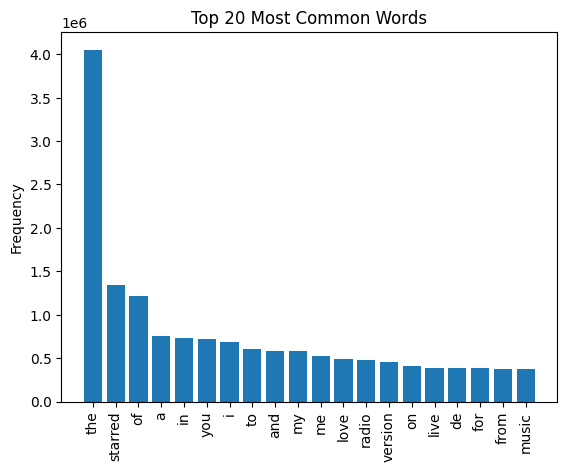

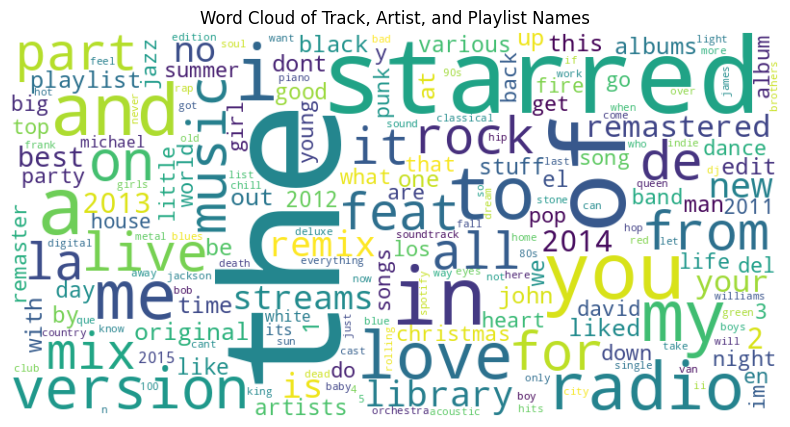

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text columns into a single string for analysis
all_text = ' '.join(df_final['trackname'].fillna('') + ' ' +
                    df_final['artistname'].fillna('') + ' ' +
                    df_final['playlistname'].fillna(''))

# Split the text into words
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Display the 10 most common words
print("Most common words:")
print(word_counts.most_common(10))

# Visualize the top 20 words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 20 Most Common Words")
plt.ylabel("Frequency")
plt.show()

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Track, Artist, and Playlist Names")
plt.show()


### Step 2: Rare and Unique Words

Number of rare words: 180063
Examples of rare words: ['christodoulou', 'barb4ry', 'battlesmallboss', 'battleorochi', 'batenkaitos', 'hortobgyigyan', 'uttejak', 'berges', 'genma', 'unassuming']


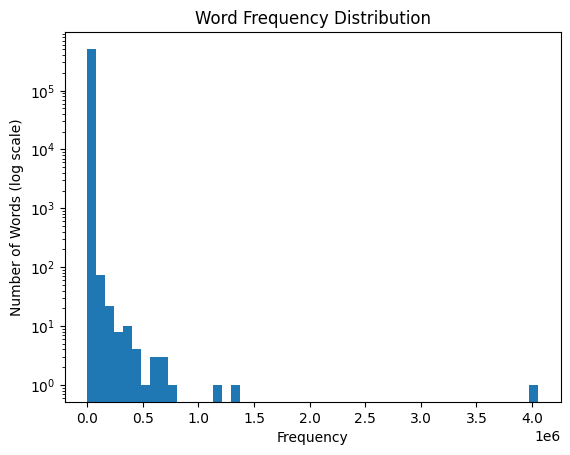

In [ ]:
# Identify rare words that occur only once
rare_words = [word for word, count in word_counts.items() if count == 1]
print(f"Number of rare words: {len(rare_words)}")
print("Examples of rare words:", rare_words[:10])

# Visualize the frequency distribution of all words
plt.hist(word_counts.values(), bins=50, log=True)
plt.title("Word Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Number of Words (log scale)")
plt.show()


### Step 3: Unusual Characters or Patterns

In [ ]:
import re

# Check for words with unusual characters
unusual_words = [word for word in word_counts.keys() if re.search(r'[^a-zA-Z0-9\s]', word)]
print(f"Number of words with unusual characters: {len(unusual_words)}")
print("Examples of words with unusual characters:", unusual_words[:10])

# Check for numbers in words
numeric_words = [word for word in word_counts.keys() if re.search(r'\d', word)]
print(f"Number of words containing numbers: {len(numeric_words)}")
print("Examples of numeric words:", numeric_words[:10])


Number of words with unusual characters: 1
Examples of words with unusual characters: ['unknown_artist']
Number of words containing numbers: 28660
Examples of numeric words: ['2010', '7', '3', '5', '2012', '1', '2080', 'c418', 'bd08', '0x10c']


### Step 4: Stop Word Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most common stop words:
[('the', 4054468), ('of', 1212455), ('a', 752283), ('in', 726628), ('you', 716803), ('i', 684184), ('to', 610761), ('and', 585116), ('my', 580685), ('me', 527998)]


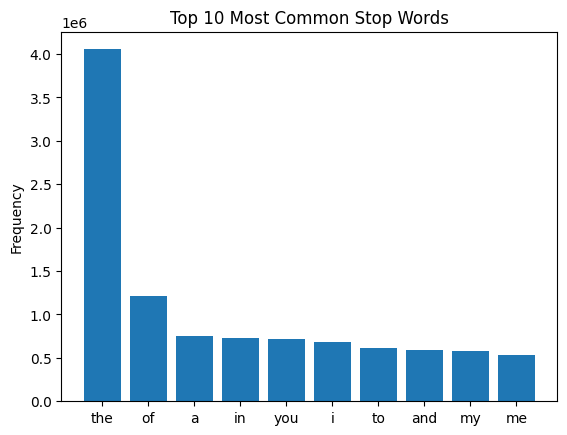

In [ ]:
from nltk.corpus import stopwords
import nltk

# Download stop words if not already downloaded
nltk.download('stopwords')

# List of stop words
stop_words = set(stopwords.words('english'))

# Count stop words in the dataset
stop_word_counts = {word: count for word, count in word_counts.items() if word in stop_words}
print("Most common stop words:")
print(sorted(stop_word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Visualize stop words
stop_words, counts = zip(*sorted(stop_word_counts.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(stop_words, counts)
plt.title("Top 10 Most Common Stop Words")
plt.ylabel("Frequency")
plt.show()


### Step 5: Case Sensitivity Check

In [ ]:
# Check for case-sensitive duplicates
case_sensitive_words = [word for word in word_counts.keys() if word.lower() != word]
print(f"Number of case-sensitive duplicates: {len(case_sensitive_words)}")
print("Examples of case-sensitive duplicates:", case_sensitive_words[:10])


Number of case-sensitive duplicates: 0
Examples of case-sensitive duplicates: []


### Step 6: Distribution of Track Lengths

Track name length statistics:
count    1.274323e+07
mean     3.451542e+00
std      2.338094e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.100000e+01
Name: track_length, dtype: float64


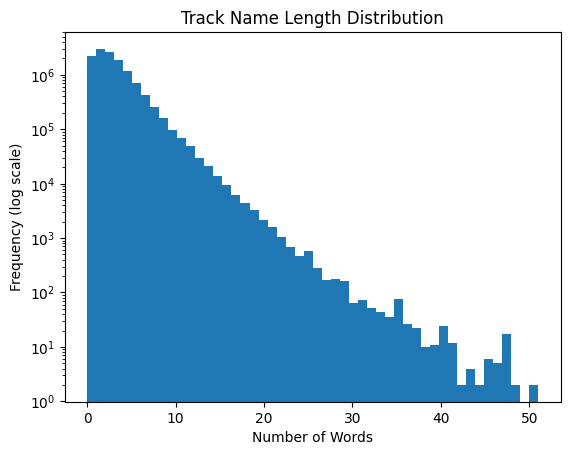

In [ ]:
# Calculate track name lengths
df_final['track_length'] = df_final['trackname'].str.split().str.len()

# Describe the track name lengths
print("Track name length statistics:")
print(df_final['track_length'].describe())

# Visualize the distribution
plt.hist(df_final['track_length'].dropna(), bins=50, log=True)
plt.title("Track Name Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency (log scale)")
plt.show()


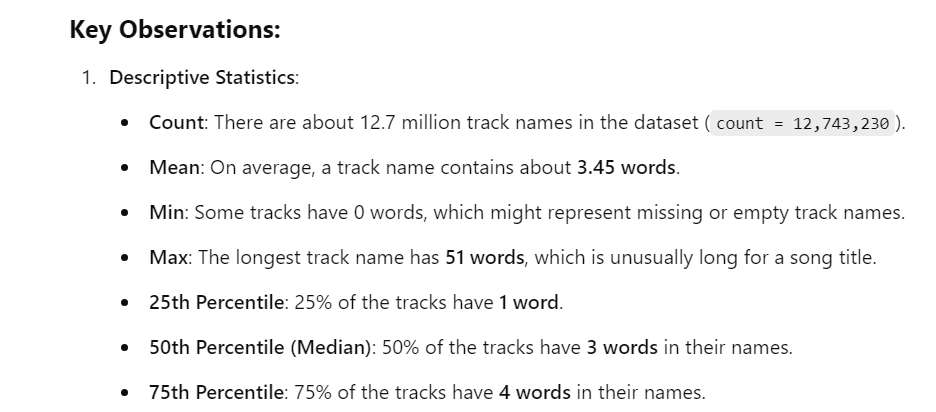

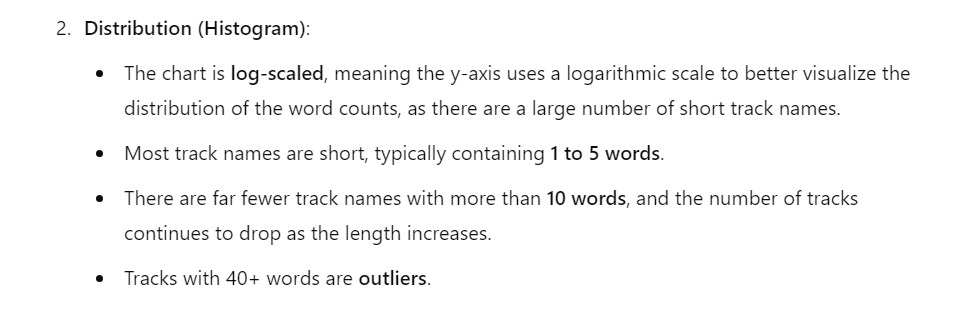

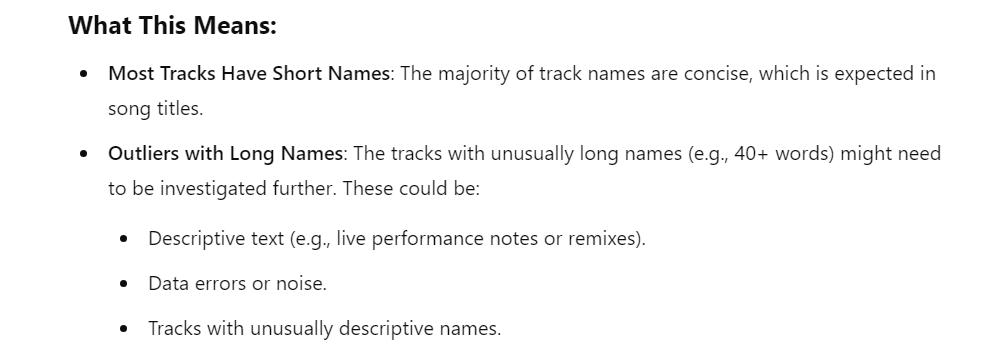

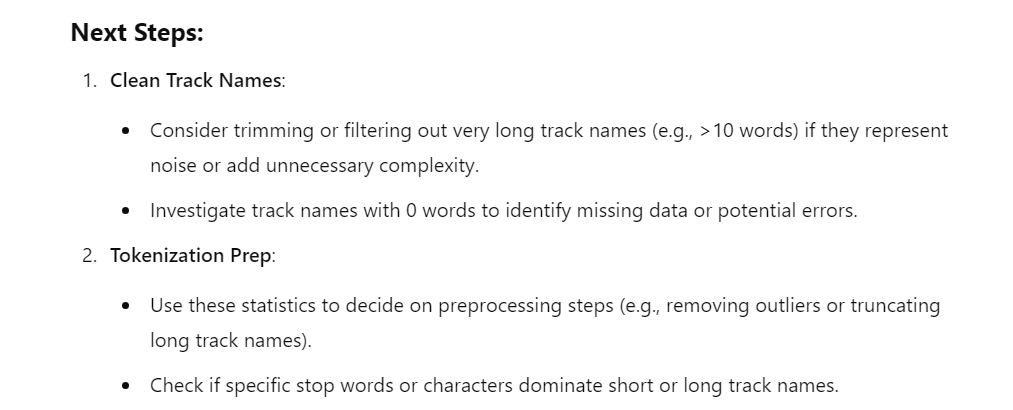

## Step 4: vocabulary and token distributions analysis of 'Starred' playlist (Outlire)

For a Word2Vec model, we primarily focus on analyzing the vocabulary and token distributions rather than diving deep into playlist-specific behaviors.

### Starred playlists a user chose - sample

In [ ]:
# Filter playlists named "starred"
starred_playlists = df_final[df_final['playlistname'].str.lower() == 'starred']

# Display the first few rows to verify
print("Starred playlists sample:")
print(starred_playlists.head())


Starred playlists sample:
                              user_id               artistname  \
767  07f0fc3be95dcd878966b1f9572ff670  bill elm  woody jackson   
768  07f0fc3be95dcd878966b1f9572ff670                  jin roh   
769  07f0fc3be95dcd878966b1f9572ff670         somethingalamode   
770  07f0fc3be95dcd878966b1f9572ff670                 pendulum   
771  07f0fc3be95dcd878966b1f9572ff670              darren korb   

                          trackname playlistname  track_length  
767  theme from red dead redemption      starred             5  
768      22  grace omega main theme      starred             5  
769                            5 am      starred             2  
770                      9000 miles      starred             2  
771                  a proper story      starred             3  


### Percentage of vocabulary from 'starred' playlists: 29.25%

In [ ]:
# Extract tokens from 'starred' playlists
starred_tokens = starred_playlists['trackname'].str.split().explode()

# Unique tokens in 'starred' playlists
unique_starred_tokens = set(starred_tokens)

print(f"Number of unique tokens in 'starred' playlists: {len(unique_starred_tokens)}")

# Compare with overall vocabulary
all_tokens = df_final['trackname'].str.split().explode()
unique_all_tokens = set(all_tokens)

print(f"Total vocabulary size: {len(unique_all_tokens)}")
print(f"Percentage of vocabulary from 'starred' playlists: {len(unique_starred_tokens) / len(unique_all_tokens) * 100:.2f}%")


Number of unique tokens in 'starred' playlists: 121471
Total vocabulary size: 415300
Percentage of vocabulary from 'starred' playlists: 29.25%


### Rare tokens in 'starred' playlists: 55529

In [ ]:
# Count token frequency in 'starred' playlists
starred_token_counts = starred_playlists['trackname'].str.split().explode().value_counts()

# Identify rare tokens (appearing only once)
rare_starred_tokens = starred_token_counts[starred_token_counts == 1]

print(f"Rare tokens in 'starred' playlists: {len(rare_starred_tokens)}")


Rare tokens in 'starred' playlists: 55529


### Analysis of Rare Tokends in "starred" playlists

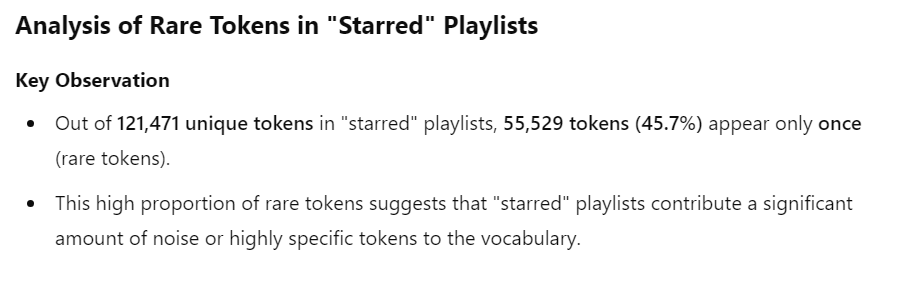

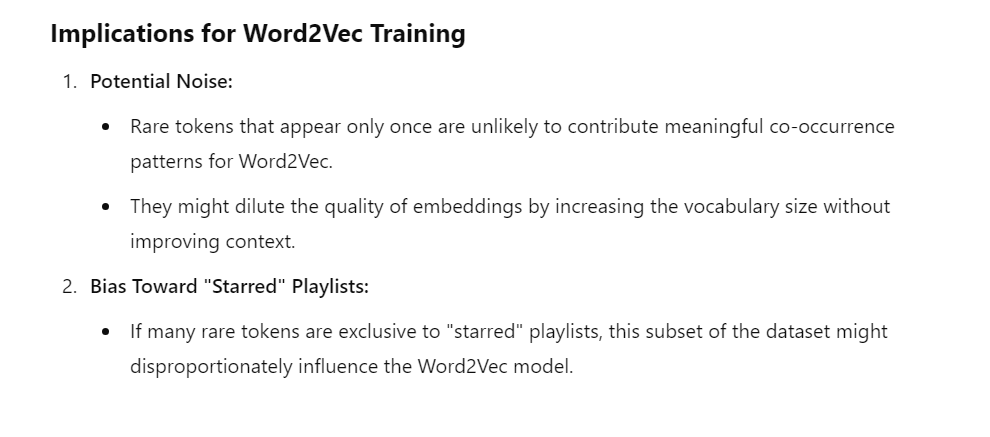

### Percentage of non-rare 'starred' tokens in the rest of the data: 98.90%


In [ ]:
# Identify non-rare tokens in "starred" playlists
non_rare_starred_tokens = starred_token_counts[starred_token_counts > 1].index

# Extract tokens from the rest of the dataset (excluding "starred" playlists)
non_starred_playlists = df_final[df_final['playlistname'].str.lower() != 'starred']
non_starred_tokens = non_starred_playlists['trackname'].str.split().explode().unique()

# Find the intersection of tokens
common_tokens = set(non_rare_starred_tokens).intersection(set(non_starred_tokens))

# Calculate the percentage
percentage_common = (len(common_tokens) / len(non_rare_starred_tokens)) * 100

# Output results
print(f"Number of non-rare tokens in 'starred' playlists: {len(non_rare_starred_tokens)}")
print(f"Number of these tokens also in the rest of the data: {len(common_tokens)}")
print(f"Percentage of non-rare 'starred' tokens in the rest of the data: {percentage_common:.2f}%")


Number of non-rare tokens in 'starred' playlists: 65922
Number of these tokens also in the rest of the data: 65200
Percentage of non-rare 'starred' tokens in the rest of the data: 98.90%


### Explanation how the starred playlist has low impact on overall metadata and word2vec model

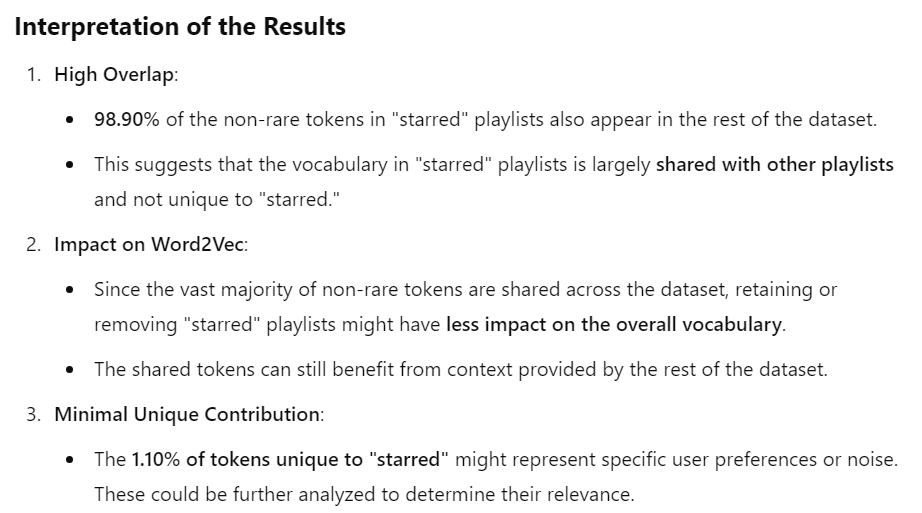

### Top 10 most common tokens in 'starred' playlists

Number of unique tokens in 'starred' playlists: 121451
Top 10 most common tokens in 'starred' playlists:
trackname
the        174439
you         69734
of          59360
i           55957
a           55695
in          52463
me          49498
version     47995
to          43883
love        42553
Name: count, dtype: int64


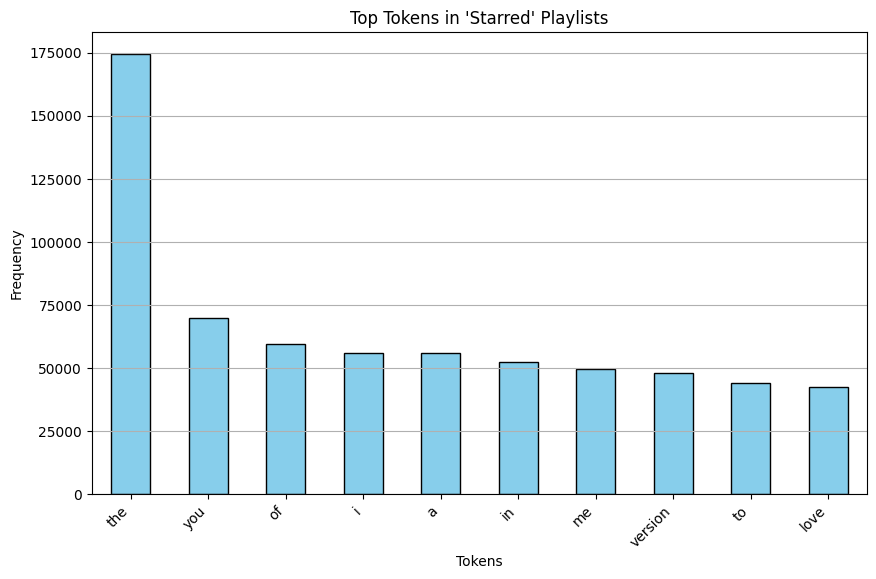

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter playlists named "starred"
starred_playlists = df_final[df_final['playlistname'].str.lower() == 'starred']

if not starred_playlists.empty:
    # Step 2: Extract tokens from 'trackname' in 'starred' playlists
    starred_tokens = starred_playlists['trackname'].str.split().explode()

    # Step 3: Count unique tokens
    unique_starred_tokens = starred_tokens.nunique()
    print(f"Number of unique tokens in 'starred' playlists: {unique_starred_tokens}")

    # Step 4: Top 10 most common tokens
    top_tokens = starred_tokens.value_counts().head(10)
    print("Top 10 most common tokens in 'starred' playlists:")
    print(top_tokens)

    # Step 5: Visualize top tokens
    plt.figure(figsize=(10, 6))
    top_tokens.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Top Tokens in 'Starred' Playlists")
    plt.xlabel("Tokens")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()
else:
    print("No playlists named 'starred' found in the dataset.")


### Percentage of rows with 'starred' playlist: 10.44%

In [ ]:
# Count the number of rows with "starred" as the playlist name
starred_rows_count = df_final[df_final['playlistname'].str.lower() == 'starred'].shape[0]

# Calculate the total number of rows in df_final
total_rows = df_final.shape[0]

# Calculate the percentage
starred_percentage = (starred_rows_count / total_rows) * 100

print(f"Total rows in dataset: {total_rows}")
print(f"Rows with 'starred' playlist: {starred_rows_count}")
print(f"Percentage of rows with 'starred' playlist: {starred_percentage:.2f}%")


Total rows in dataset: 12743230
Rows with 'starred' playlist: 1330529
Percentage of rows with 'starred' playlist: 10.44%


### Number of users who chose ONLY 'starred': 587

In [ ]:
# Step 1: Find users with only "starred" playlists
only_starred_users = df_final.groupby('user_id')['playlistname'].apply(lambda x: set(x.str.lower()) == {'starred'})

# Filter users who chose only "starred"
only_starred_users = only_starred_users[only_starred_users].index

# Step 2: Count and display the results
num_only_starred_users = len(only_starred_users)

print(f"Number of users who chose only 'starred': {num_only_starred_users}")
print("List of users who chose only 'starred':")
print(only_starred_users)


Number of users who chose only 'starred': 587
List of users who chose only 'starred':
Index(['00152c870313100559aad7b097d9c1f5', '004e1cd03ad00ebedf071ffd98665649',
       '0059ac6b3ba3c3f415f09059a3bd703a', '008ac656ed12da791d53ff9f20b17123',
       '009d6038a80daf642db5d1198b760c58', '0129886994c81e6fabc08e5ab2fa494b',
       '016a8eb7c9e5f511bd3749552ab19e56', '017f53f1df26e5adad6a0b93cef8f97b',
       '01ef80101c7c3126b0eab7d5b8071800', '02ac1d2720b551f943ab71f611de9492',
       ...
       'fb465982fe21db80a4bd4719aa80e41e', 'fc37c995a978d79c885f6195c0a360bb',
       'fc7e7592d3afdc92cfb033b1d4174afa', 'fc9922affe4ef68b48c9b01b61c37571',
       'fd94eb26d022a4e17726bbba299683da', 'fe01f365c5423a6d5f064342bec48b38',
       'feeba387444e26c1a1bcf0acf2230f2b', 'fef8fecef4e61a64b3ab7200f249233d',
       'fefb842b510211baa5d17af12d39f1b7', 'ff837f2820fc0d31472a77a6a56f111a'],
      dtype='object', name='user_id', length=587)


## Step 5: User analysis

### 1. Count Playlists per User

In [ ]:
# Count the number of playlists per user
playlists_per_user = df_final.groupby('user_id')['playlistname'].nunique()

# Display summary statistics
print("Playlists per user statistics:")
print(playlists_per_user.describe())

# Top users with the most playlists
print("\nTop 10 users with the most playlists:")
print(playlists_per_user.sort_values(ascending=False).head(10))


Playlists per user statistics:
count    15864.000000
mean        14.498361
std         14.774742
min          1.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        184.000000
Name: playlistname, dtype: float64

Top 10 users with the most playlists:
user_id
872a19d491f4357408551be6d7eea273    184
19ccdb5f2ce9193e6028923f65afaac2    105
57c4979b17f7563f83e69f09701eb584     76
39bd43df0c61c451361200312a4ab6e0     73
13c6654d04eb2e0c09671c8868393722     68
8b604df97432544b8788112f36bc2f07     67
3315b4b13f69b2b3931b0e18a4de512d     58
1dcaa0c136f62562a57acf67b4d0b27f     58
599977e70ddc103506191d0efe38f1b3     56
15af84959451245e028e61c331bdbff4     55
Name: playlistname, dtype: int64


### 2. Visualize Playlists per User

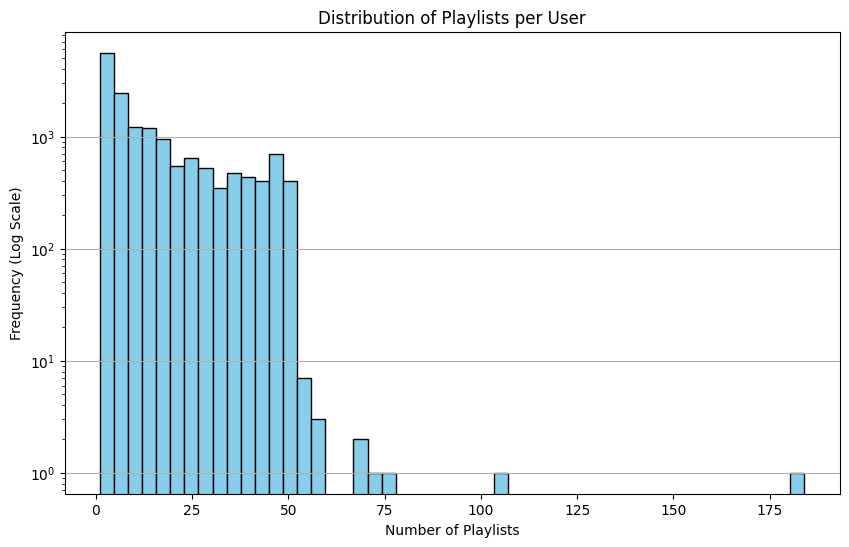

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(playlists_per_user, bins=50, log=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Playlists per User")
plt.xlabel("Number of Playlists")
plt.ylabel("Frequency (Log Scale)")
plt.grid(axis='y')
plt.show()


### 3. Count Tracks per User

In [ ]:
# Count the number of tracks per user
tracks_per_user = df_final.groupby('user_id')['trackname'].nunique()

# Display summary statistics
print("Tracks per user statistics:")
print(tracks_per_user.describe())

# Top users with the most tracks
print("\nTop 10 users with the most tracks:")
print(tracks_per_user.sort_values(ascending=False).head(10))


Tracks per user statistics:
count     15864.000000
mean        695.698311
std        2058.579181
min           1.000000
25%          88.000000
50%         331.000000
75%         782.000000
max      186096.000000
Name: trackname, dtype: float64

Top 10 users with the most tracks:
user_id
4398de6902abde3351347b048fcdc287    186096
7ee2b92c5bcf6133b8132363e5bda960     78448
fa849dabeb14a2800ad5130907fc5018     47789
ed140fce438f59e6e07e5ee7bd726692     28958
99deafd9b792af8e6a535483088faef2     28853
c410ee930bd5f0e4893632503ec17b05     22942
32b524ed367b1e5a714228fbec80849d     20690
c0efe4e704a37894150489b25eac9042     20184
a9f844ceb4d928d7ff7c189211f301c5     19744
2fa1f93e57cfe2f6c4456e98da54061c     19007
Name: trackname, dtype: int64


### 4. Visualize Tracks per User

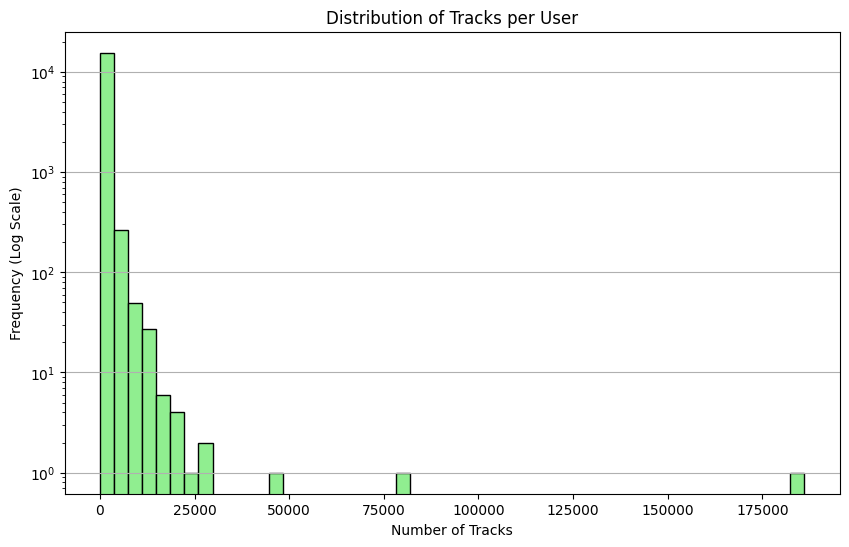

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tracks_per_user, bins=50, log=True, color='lightgreen', edgecolor='black')
plt.title("Distribution of Tracks per User")
plt.xlabel("Number of Tracks")
plt.ylabel("Frequency (Log Scale)")
plt.grid(axis='y')
plt.show()


### 5. Top Users with "Starred" Playlists

In [ ]:
# Filter for "starred" playlists
starred_users = df_final[df_final['playlistname'].str.lower() == 'starred']

# Count the number of "starred" playlists per user
starred_playlists_per_user = starred_users.groupby('user_id')['playlistname'].nunique()

print("Top 10 users with the most 'starred' playlists:")
print(starred_playlists_per_user.sort_values(ascending=False).head(10))


Top 10 users with the most 'starred' playlists:
user_id
000b0f32b5739f052b9d40fcc5c41079    1
ab8516d20963849fc81be7dac21a29ac    1
abfaf1cbf7b20c5e60915bea2c410f24    1
abe6a95b5cc93bbd11ea898963da50a3    1
abc451989719e1f01abd3b3c371c5b77    1
abb68f21d1fd7f0da73f59ac0d6c913e    1
abb4798b059858311c38c1e74a7b1e87    1
abad74dc8dd4e666166fafc5d3277b39    1
ab8d8ef535cd803db4e8fd6a27ab3f0f    1
ab7808569290a47946184b2b3bdb4c7d    1
Name: playlistname, dtype: int64


### 6. Percentage of Users with a Single Playlist

In [ ]:
# Count playlists per user
single_playlist_users = (playlists_per_user == 1).sum()

# Calculate the percentage
percentage_single_playlist = (single_playlist_users / playlists_per_user.shape[0]) * 100

print(f"Number of users with a single playlist: {single_playlist_users}")
print(f"Percentage of users with a single playlist: {percentage_single_playlist:.2f}%")


Number of users with a single playlist: 2202
Percentage of users with a single playlist: 13.88%


### 7. Total unique users in df_final: 15864 & Percentage of users who chose 'starred': 31.64%

In [ ]:
# Total number of unique users
total_unique_users = df_final['user_id'].nunique()

# Filter rows with "starred" playlists and count unique users
starred_users_count = df_final[df_final['playlistname'].str.lower() == 'starred']['user_id'].nunique()

# Calculate percentage of users who chose "starred"
starred_users_percentage = (starred_users_count / total_unique_users) * 100

# Print results
print(f"Total unique users in df_final: {total_unique_users}")
print(f"Number of users who chose 'starred': {starred_users_count}")
print(f"Percentage of users who chose 'starred': {starred_users_percentage:.2f}%")


Total unique users in df_final: 15864
Number of users who chose 'starred': 5019
Percentage of users who chose 'starred': 31.64%


**### Summary about users and playlists in the metadata**

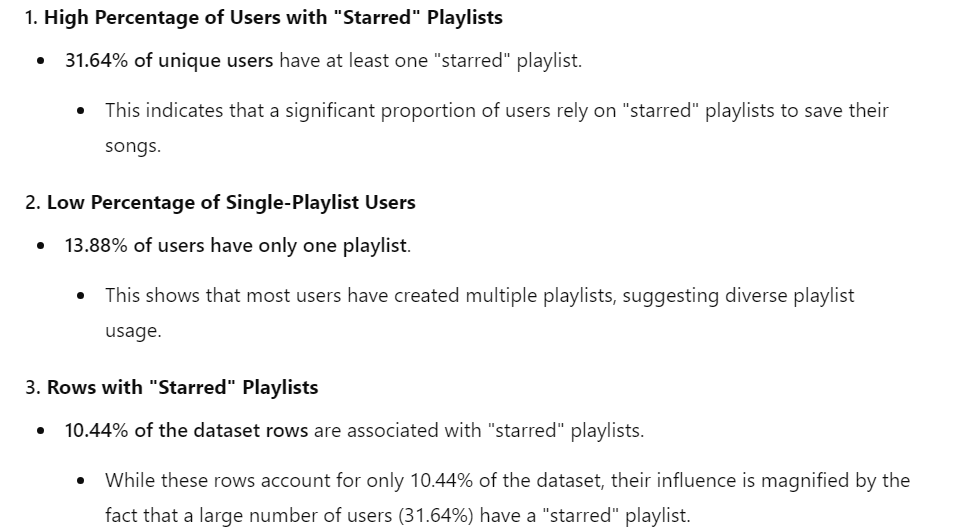

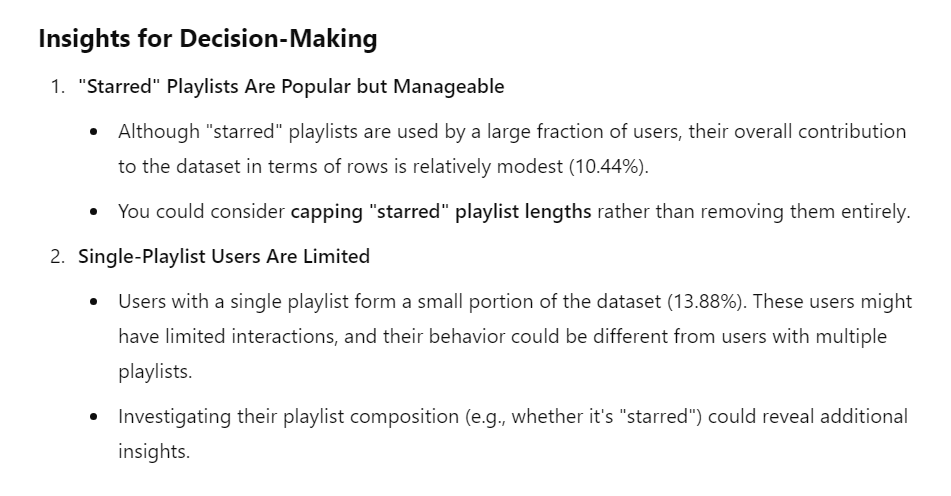

## Step 6: Handle Outliers (Removing 'starred' and checking for outliers in trackname count per user)



As explained before - 'Starred' is not a playlist but rather "liked-songs" by different users and because it is named the same for all users then all their liked songs go to 'starred'.

'Starred' has been found to have non-rare tokens that represent 98% of the data, so there will be a low impact to the token diversity in dataset if we choose to remove this playlist.

'Starred' is an outlier with 1,330,529 tracks.
it is generic and potentially has noisy nature.

'Starred' is the one and only playlist for 587 unique users, so removing means losing information for those users. But the dataset is still very big and has diversity, so again - low impact on the rest of this project.

By removing 'starred' playlist, then dataset size will be reduced without losing much diversity in user interactions.

### Saving the 'starred' playlists to df_starred.csv

In [ ]:
# Extract rows with "starred" playlists
df_starred = df_final[df_final['playlistname'].str.lower() == 'starred']

# Save the "starred" playlists to a CSV file
df_starred.to_csv('df_starred.csv', index=False)

print(f"'Starred' playlists saved as 'df_starred.csv'.")
print(f"Number of rows with 'starred' playlists: {df_starred.shape[0]}")
print(f"Number of unique users with 'starred' playlists: {df_starred['user_id'].nunique()}")


'Starred' playlists saved as 'df_starred.csv'.
Number of rows with 'starred' playlists: 1330529
Number of unique users with 'starred' playlists: 5019


In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1rlK3-msDiu7LJowfbJlFGhkAzREwuEIg'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'df_starred.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1rlK3-msDiu7LJowfbJlFGhkAzREwuEIg
To: /content/df_starred.csv
100%|██████████| 96.7M/96.7M [00:01<00:00, 52.8MB/s]


'df_starred.csv'

### Removing 'starred' playlist (creating: df_without_starred.csv)


In [ ]:
# Remove rows with "starred" playlists
df_without_starred = df_final[df_final['playlistname'].str.lower() != 'starred']

# Save the cleaned dataset to a CSV file
df_without_starred.to_csv('df_without_starred.csv', index=False)

print(f"Dataset without 'starred' playlists saved as 'df_without_starred.csv'.")
print(f"Number of rows after removing 'starred': {df_without_starred.shape[0]}")
print(f"Number of unique users after removing 'starred': {df_without_starred['user_id'].nunique()}")


Dataset without 'starred' playlists saved as 'df_without_starred.csv'.
Number of rows after removing 'starred': 11412701
Number of unique users after removing 'starred': 15277


In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df_without_starred.shape)

# Display the basic information about the DataFrame
print("\nBasic Info:")
print(df_without_starred.info())

# Display the first few rows for a quick check
print("\nFirst 5 rows:")
print(df_without_starred.head())

Shape of the DataFrame: (11412701, 4)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11412701 entries, 0 to 12743251
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 435.4+ MB
None

First 5 rows:
                            user_id                       artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                     tiffany page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   

                                          trackname    playlistname  
0                the angels wanna wear my red shoes  hard rock 2010  
1  whats so funny bout peace love and understandi

### Summary Statistics for Tracks per User:

In [ ]:
# Count the number of tracks per user_id
tracks_per_user = df_without_starred.groupby('user_id')['trackname'].count()

# Display the result
print(tracks_per_user)

# Save the counts to a CSV file for further review
tracks_per_user.to_csv('tracks_per_user.csv', header=['track_count'])
print("Track counts per user saved to 'tracks_per_user.csv'")


user_id
00055176fea33f6e027cd3302289378b      120
0007f3dd09c91198371454c608d47f22       97
000b0f32b5739f052b9d40fcc5c41079       75
000c11a16c89aa4b14b328080f5954ee      716
00123e0f544dee3ab006aa7f1e5725a7    18395
                                    ...  
ffe32d5412269f3041c58cbf0dde3306       58
ffec270eae226caa14ddaef291d73fff       32
fff60baf392613ed33f745b89a9b38f7      552
fff616055993498d6127f3f467cf9f2b     3087
fff77dadf8528083c920b9c018847e8b      295
Name: trackname, Length: 15277, dtype: int64
Track counts per user saved to 'tracks_per_user.csv'


In [ ]:
import pandas as pd

# Count the number of tracks per user_id
tracks_per_user = df_without_starred.groupby('user_id')['trackname'].count()

# Generate a summary of statistics
summary = tracks_per_user.describe()

# Display the summary statistics
print("Summary Statistics for Tracks per User:")
print(summary)

# Generate a frequency table
frequency_table = tracks_per_user.value_counts().sort_index()

# Display the frequency table
print("\nFrequency Table (Tracks per User):")
print(frequency_table)

# Save the results to CSV files for further analysis
summary.to_csv('tracks_per_user_summary.csv', header=['Value'])
frequency_table.to_csv('tracks_per_user_frequency.csv', header=['Frequency'])
print("\nSummary and frequency saved to CSV files.")


Summary Statistics for Tracks per User:
count     15277.000000
mean        747.051188
std        2646.441266
min           1.000000
25%          87.000000
50%         329.000000
75%         814.000000
max      247557.000000
Name: trackname, dtype: float64

Frequency Table (Tracks per User):
trackname
1         232
2         124
3          81
4          68
5          62
         ... 
38844       1
59462       1
65802       1
90042       1
247557      1
Name: count, Length: 2709, dtype: int64

Summary and frequency saved to CSV files.


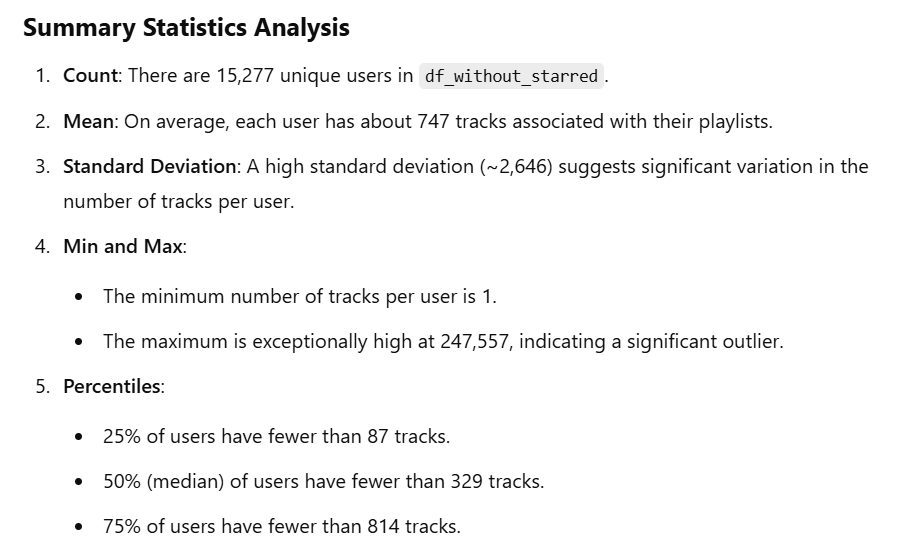

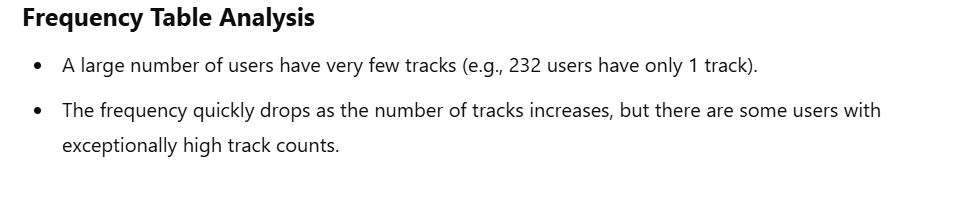

### Investigating the outliers in count of trackname per unique user_id. To get a better feel of the imbalance and how to deal with it.

In [ ]:
# Count the number of tracks per user
tracks_per_user = df_without_starred.groupby('user_id')['trackname'].count()

# Filter users with more than 500 tracks
users_with_more_than_500_tracks = tracks_per_user[tracks_per_user > 500]

# Count the number of such users
num_users_more_than_500 = users_with_more_than_500_tracks.count()

print(f"Number of users with more than 500 tracknames: {num_users_more_than_500}")


Number of users with more than 500 tracknames: 6121


In [ ]:
ranges = [0, 100, 500, 1000, 5000, 10000, tracks_per_user.max()]
range_labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '>10000']
user_ranges = pd.cut(tracks_per_user, bins=ranges, labels=range_labels)

# Count users in each range
user_range_counts = user_ranges.value_counts().sort_index()

print("Users by Track Count Ranges:")
print(user_range_counts)

# Save to a file
user_range_counts.to_csv('user_track_count_ranges.csv', header=['User Count'])


Users by Track Count Ranges:
trackname
0-100         4148
101-500       5008
501-1000      3150
1001-5000     2725
5001-10000     180
>10000          66
Name: count, dtype: int64


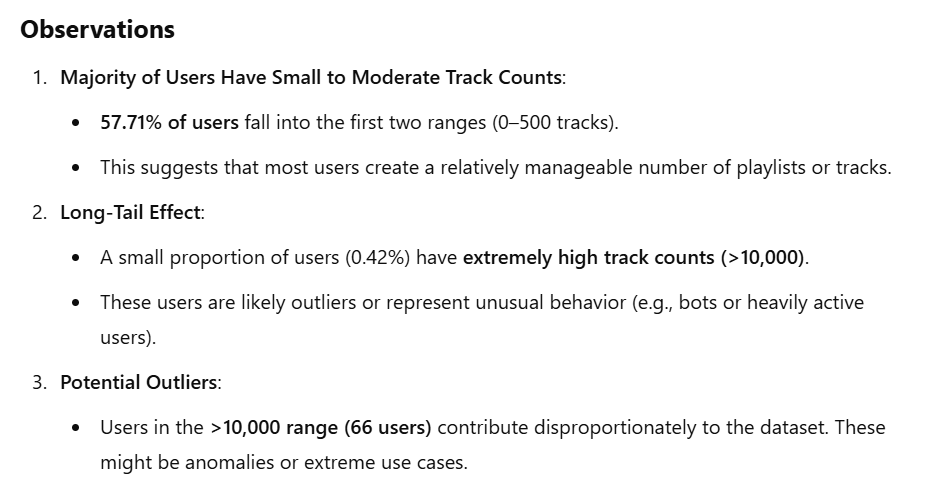

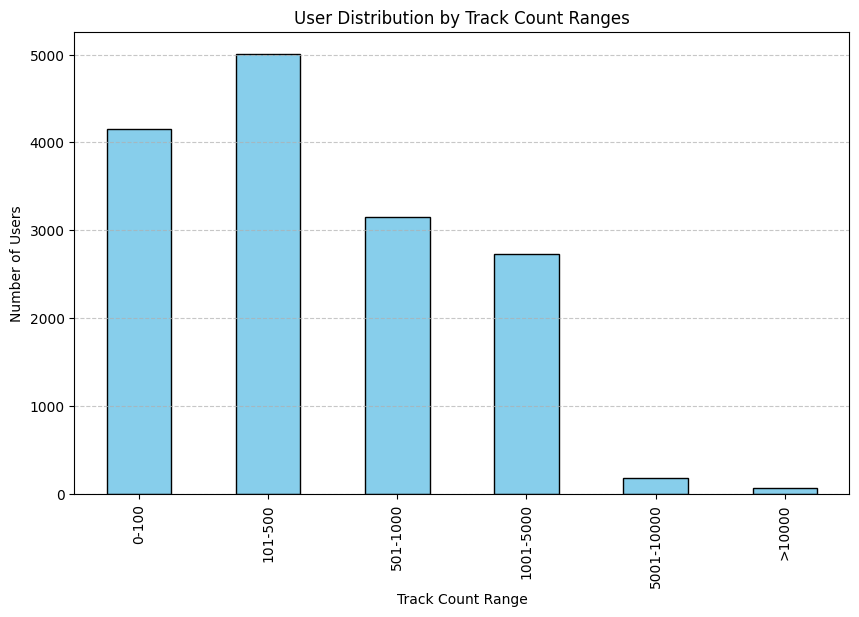

In [ ]:
user_range_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title("User Distribution by Track Count Ranges")
plt.xlabel("Track Count Range")
plt.ylabel("Number of Users")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


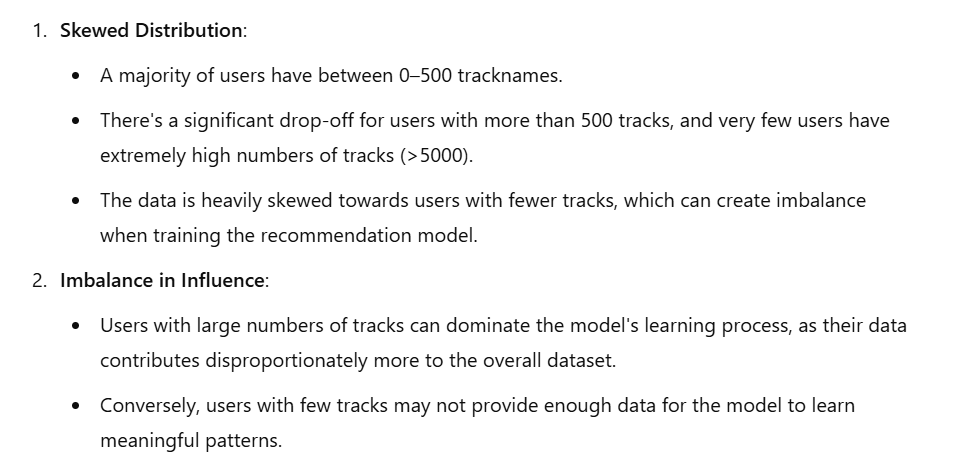

In [ ]:
# Count the number of tracknames per user_id
tracks_per_user = df_without_starred.groupby('user_id')['trackname'].count()

# Filter users with fewer than 2 tracknames
users_with_less_than_2_tracks = tracks_per_user[tracks_per_user < 2]

# Count and display the results
num_users_with_less_than_2_tracks = users_with_less_than_2_tracks.shape[0]
print(f"Number of users with less than 2 tracknames: {num_users_with_less_than_2_tracks}")


Number of users with less than 2 tracknames: 232


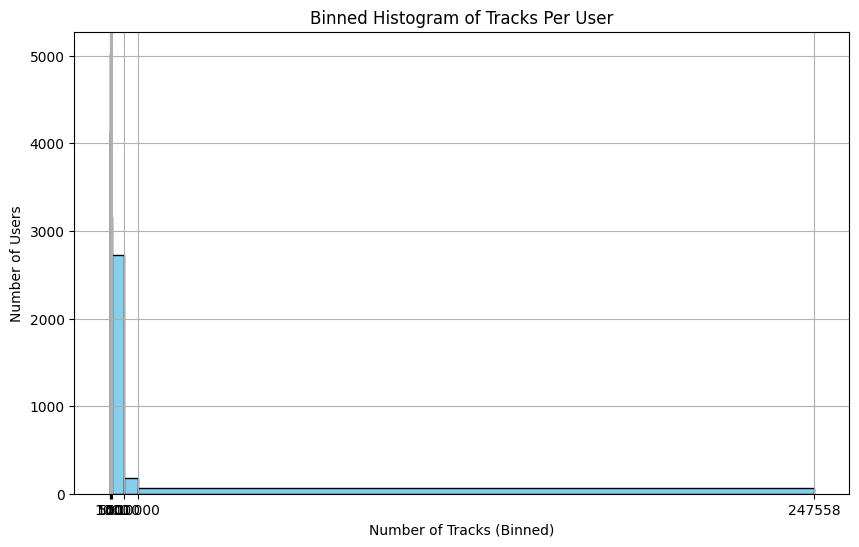

Total Users: 15277
Users with Tracks Between 1-1000: 12306
Percentage of Users in Range: 80.55%


In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Calculate the count of tracknames per user
tracks_per_user = df_without_starred.groupby('user_id')['trackname'].count()

# Define bins for the histogram
bins = [1, 100, 500, 1000, 5000, 10000, max(tracks_per_user) + 1]

# Create a histogram
plt.figure(figsize=(10, 6))
tracks_per_user.hist(bins=bins, edgecolor='black', color='skyblue')
plt.title("Binned Histogram of Tracks Per User")
plt.xlabel("Number of Tracks (Binned)")
plt.ylabel("Number of Users")
plt.xticks(bins)
plt.show()

# Calculate a summary for the specified range (1-1000)
users_in_range = tracks_per_user[(tracks_per_user >= 1) & (tracks_per_user <= 1000)].count()
total_users = len(tracks_per_user)
percentage_in_range = (users_in_range / total_users) * 100

# Display the summary
print(f"Total Users: {total_users}")
print(f"Users with Tracks Between 1-1000: {users_in_range}")
print(f"Percentage of Users in Range: {percentage_in_range:.2f}%")


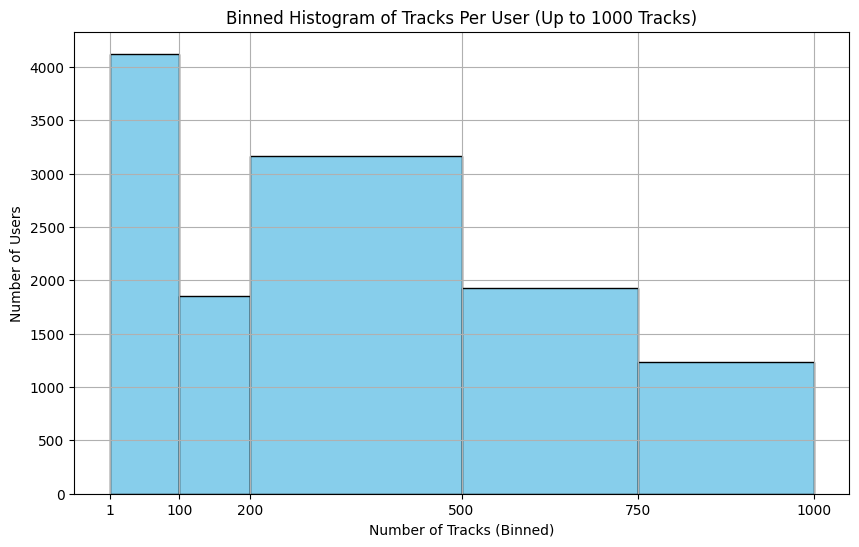

Total Users: 15277
Users with Tracks Between 1-1000: 12306
Percentage of Users in Range: 80.55%


In [ ]:
# Define new bins for the histogram, limiting to 1-1000 tracks
bins = [1, 100, 200, 500, 750, 1000]

# Create a histogram for users with up to 1000 tracks
plt.figure(figsize=(10, 6))
tracks_per_user[tracks_per_user <= 1000].hist(bins=bins, edgecolor='black', color='skyblue')
plt.title("Binned Histogram of Tracks Per User (Up to 1000 Tracks)")
plt.xlabel("Number of Tracks (Binned)")
plt.ylabel("Number of Users")
plt.xticks(bins)
plt.show()

# Calculate a summary for users with up to 1000 tracks
users_in_range = tracks_per_user[(tracks_per_user >= 1) & (tracks_per_user <= 1000)].count()
total_users = len(tracks_per_user)
percentage_in_range = (users_in_range / total_users) * 100

# Display the corrected summary
print(f"Total Users: {total_users}")
print(f"Users with Tracks Between 1-1000: {users_in_range}")
print(f"Percentage of Users in Range: {percentage_in_range:.2f}%")


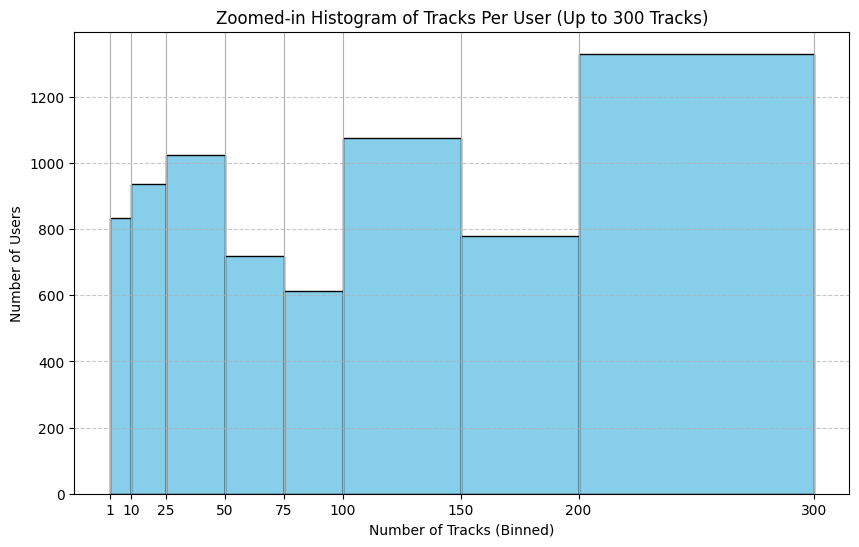

Total Users: 15277
Users with Tracks Between 1-300: 7308
Percentage of Users in Range: 47.84%


In [ ]:
# Define bins for a zoomed-in histogram (e.g., focusing on users with fewer than 300 tracks)
bins = [1, 10, 25, 50, 75, 100, 150, 200, 300]

# Create a zoomed-in histogram
plt.figure(figsize=(10, 6))
tracks_per_user[tracks_per_user <= 300].hist(bins=bins, edgecolor='black', color='skyblue')
plt.title("Zoomed-in Histogram of Tracks Per User (Up to 300 Tracks)")
plt.xlabel("Number of Tracks (Binned)")
plt.ylabel("Number of Users")
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate statistics for users with fewer than 300 tracks
users_in_zoom_range = tracks_per_user[tracks_per_user <= 300].count()
percentage_in_zoom_range = (users_in_zoom_range / total_users) * 100

# Display the summary
print(f"Total Users: {total_users}")
print(f"Users with Tracks Between 1-300: {users_in_zoom_range}")
print(f"Percentage of Users in Range: {percentage_in_zoom_range:.2f}%")


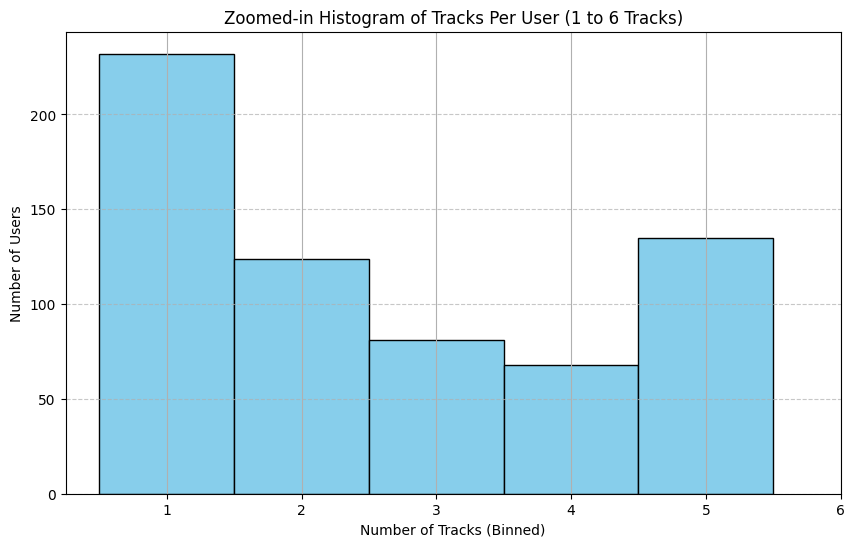

Total Users: 15277
Users with Tracks Between 1-6: 640
Percentage of Users in Range: 4.19%


In [ ]:
# Define bins for a zoomed-in histogram (e.g., focusing on users with 1-6 tracks)
bins = [1, 2, 3, 4, 5, 6]

# Create a zoomed-in histogram
plt.figure(figsize=(10, 6))
tracks_per_user[tracks_per_user <= 6].hist(bins=bins, edgecolor='black', color='skyblue', align='left')
plt.title("Zoomed-in Histogram of Tracks Per User (1 to 6 Tracks)")
plt.xlabel("Number of Tracks (Binned)")
plt.ylabel("Number of Users")
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate statistics for users with 1-6 tracks
users_in_zoom_range = tracks_per_user[(tracks_per_user >= 1) & (tracks_per_user <= 6)].count()
percentage_in_zoom_range = (users_in_zoom_range / total_users) * 100

# Display the summary
print(f"Total Users: {total_users}")
print(f"Users with Tracks Between 1-6: {users_in_zoom_range}")
print(f"Percentage of Users in Range: {percentage_in_zoom_range:.2f}%")


# Data Preparation (using df_without_starred)

## Direct link to open df_without_starred.csv file

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1KmuvtQGND2kGil4WYacwzdbOSJ8wFzTp'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'df_without_starred.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1KmuvtQGND2kGil4WYacwzdbOSJ8wFzTp
From (redirected): https://drive.google.com/uc?export=download&id=1KmuvtQGND2kGil4WYacwzdbOSJ8wFzTp&confirm=t&uuid=fdd64386-b27e-43e8-bc11-34093568f80d
To: /content/df_without_starred.csv
100%|██████████| 947M/947M [00:14<00:00, 67.1MB/s]


'df_without_starred.csv'

In [ ]:
# Load the final saved file
df_without_starred = pd.read_csv('df_without_starred.csv')

df_without_starred.shape

(11412701, 4)

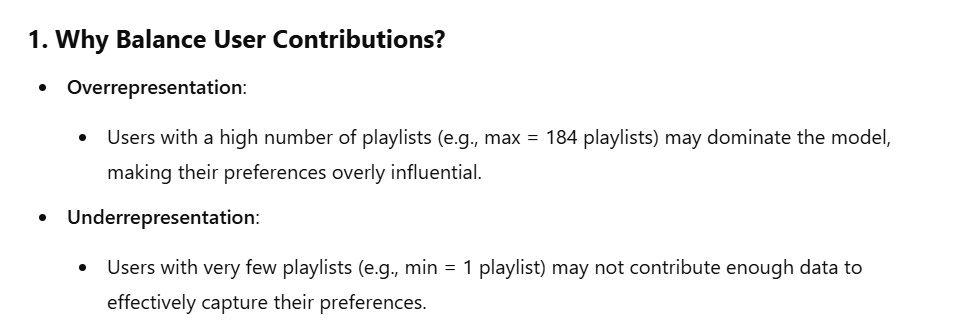

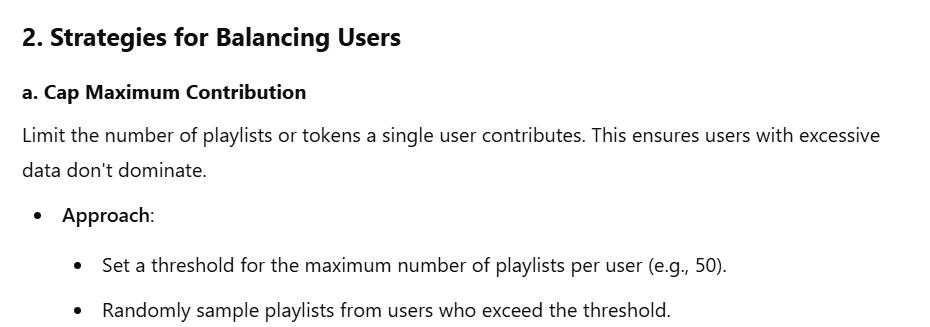

## **The chosen method for balancing data from different users:**

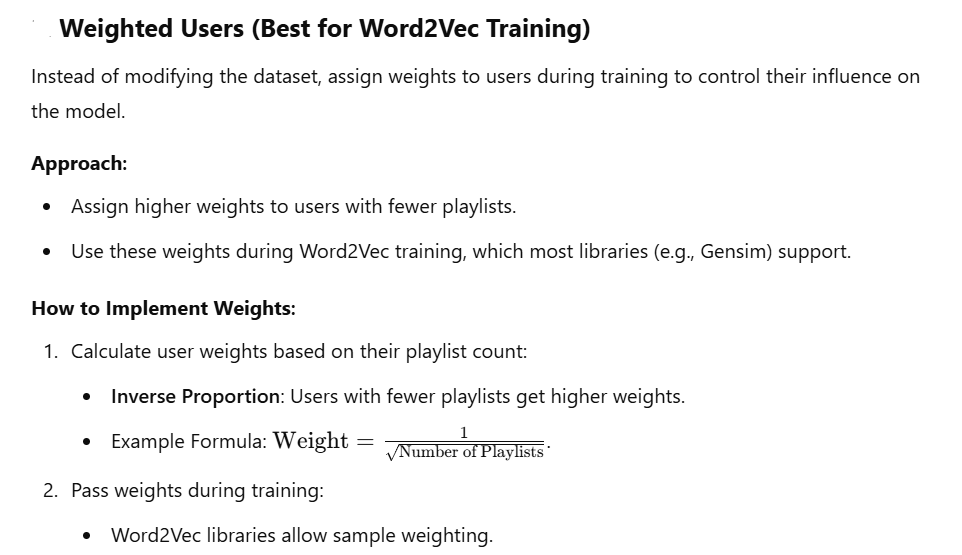

In [ ]:
import numpy as np

# Load the final saved file
df_without_starred = pd.read_csv('df_without_starred.csv')

# Calculate weights for each user
user_playlist_counts = df_without_starred.groupby('user_id')['playlistname'].nunique()
user_weights = (1 / np.sqrt(user_playlist_counts)).to_dict()

# Add weights to the dataframe
df_without_starred['user_weight'] = df_without_starred['user_id'].map(user_weights)

print("User weights calculated.")


User weights calculated.


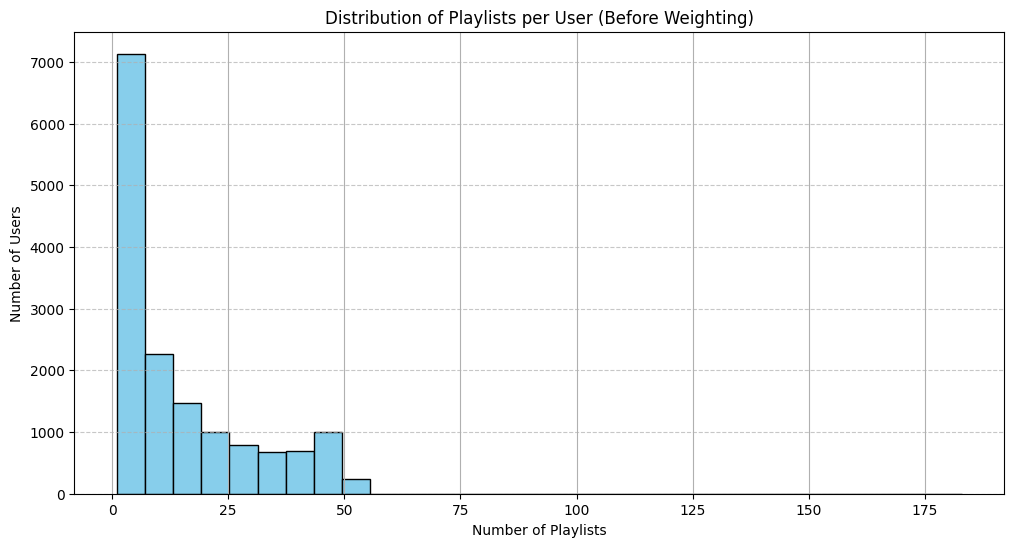

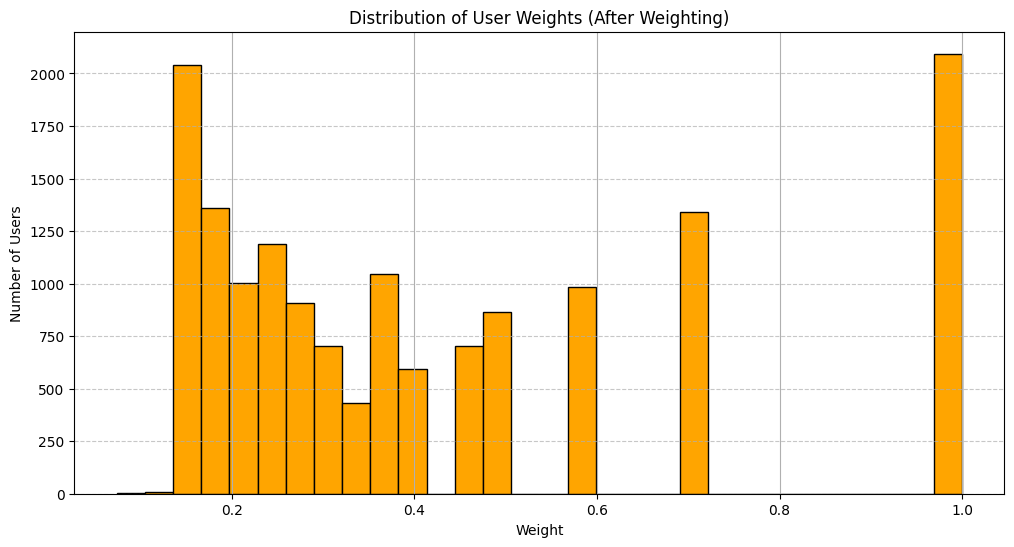

Visualizations completed: Before and after weighting.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate playlists per user (before weighting)
user_playlist_counts = df_without_starred.groupby('user_id')['playlistname'].nunique()

# Step 2: Calculate weights for each user
# Weight formula: Inverse square root of playlist count
user_weights = (1 / np.sqrt(user_playlist_counts)).to_dict()

# Step 3: Visualize Before Weighting
plt.figure(figsize=(12, 6))
user_playlist_counts.hist(bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Playlists per User (Before Weighting)")
plt.xlabel("Number of Playlists")
plt.ylabel("Number of Users")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 4: Visualize After Weighting
# Extract weights into a Series for plotting
user_weights_series = pd.Series(user_weights)

plt.figure(figsize=(12, 6))
user_weights_series.hist(bins=30, edgecolor='black', color='orange')
plt.title("Distribution of User Weights (After Weighting)")
plt.xlabel("Weight")
plt.ylabel("Number of Users")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Visualizations completed: Before and after weighting.")


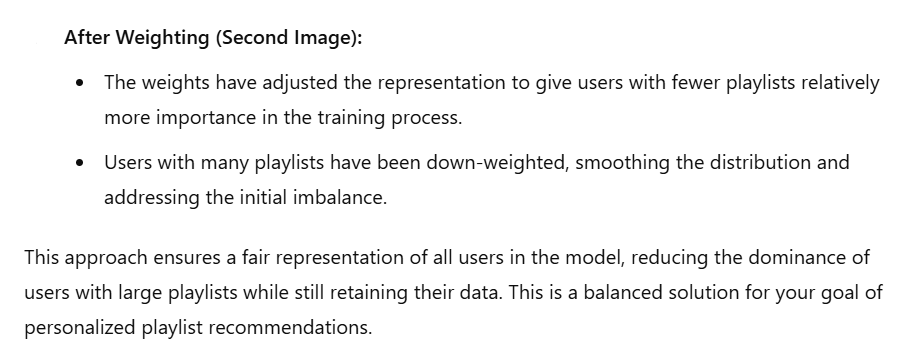

### Balancing users - Saved file 'df_without_starred_user_weighted.csv'

In [ ]:
# Save the weighted df_without_starred to a new CSV file
df_without_starred.to_csv('df_without_starred_user_weighted.csv', index=False)
print("Weighted df_without_starred saved: df_without_starred_user_weighted.csv")


Weighted df_without_starred saved: df_without_starred_user_weighted.csv


In [ ]:
df_without_starred.shape

(11412701, 5)

## **Balancing the count of trackname in the playlists - Retention of Larger Playlists:**

The remaining dataset will primarily consist of users with enough tracknames to provide a strong signal for personalized playlist recommendations.

### Direct link to 'df_without_starred_user_weighted.csv'

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1X6-i9DKTieulWkBVjFBgmCnkOh6rdALT'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'df_without_starred_user_weighted.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1X6-i9DKTieulWkBVjFBgmCnkOh6rdALT
From (redirected): https://drive.google.com/uc?export=download&id=1X6-i9DKTieulWkBVjFBgmCnkOh6rdALT&confirm=t&uuid=77ca69d6-6e26-4ac3-8a03-2fa3fc8085cf
To: /content/df_without_starred_user_weighted.csv
100%|██████████| 1.16G/1.16G [00:18<00:00, 61.5MB/s]


'df_without_starred_user_weighted.csv'

In [ ]:
# Load the final saved file
df_without_starred_user_weighted = pd.read_csv('df_without_starred_user_weighted.csv')

In [ ]:
import pandas as pd

# Calculate the number of tracknames per user
tracknames_per_user = df_without_starred_user_weighted.groupby('user_id')['trackname'].count()

# Identify users with 6 or fewer tracknames
users_to_remove = tracknames_per_user[tracknames_per_user <= 6].index

# Filter the dataframe to retain only users with more than 6 tracknames
df_retained = df_without_starred_user_weighted[~df_without_starred['user_id'].isin(users_to_remove)]

# Save the filtered dataframe to a new CSV
df_retained.to_csv('df_without_starred_retained_large_playlists.csv', index=False)
print("Filtered dataframe saved: df_without_starred_retained_large_playlists.csv")

# Summary of the filtering
print(f"Total users removed: {len(users_to_remove)}")
print(f"Remaining rows in the dataframe: {df_retained.shape[0]}")


Filtered dataframe saved: df_without_starred_retained_large_playlists.csv
Total users removed: 640
Remaining rows in the dataframe: 11410958


In [ ]:
# Load the retained dataframe
df_retained = pd.read_csv('df_without_starred_retained_large_playlists.csv')

# Check the basic info of the dataframe
print("DataFrame Info:")
print(df_retained.info())

# Count unique user IDs
unique_users = df_retained['user_id'].nunique()
print(f"\nNumber of unique user IDs in df_retained: {unique_users}")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11410958 entries, 0 to 11410957
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       object 
 1   artistname    object 
 2   trackname     object 
 3   playlistname  object 
 4   user_weight   float64
dtypes: float64(1), object(4)
memory usage: 435.3+ MB
None

Number of unique user IDs in df_retained: 14637


### Excluding edge-cases for 66 unique users who have very long (above 10,000 tracknames) playlist/s and are either bots or heavily users who represent annomality behaviour to check later on, but now we exclude to better balance the playlists (meaning trackname count balancing) - creating 'df_retained_filtered.csv' and 'extreme_users.csv'

In [ ]:
# Step 1: Identify users with more than 10,000 tracks
user_track_counts = df_retained.groupby('user_id')['trackname'].count()
extreme_users = user_track_counts[user_track_counts > 10000].index

print(f"Number of users with more than 10,000 tracks: {len(extreme_users)}")

# Step 2: Separate these users into a different dataframe
extreme_users_df = df_retained[df_retained['user_id'].isin(extreme_users)]

# Step 3: Exclude these users from the main dataframe
df_retained_filtered = df_retained[~df_retained['user_id'].isin(extreme_users)]

# Step 4: Save both dataframes to separate CSV files
extreme_users_df.to_csv('extreme_users.csv', index=False)
print("Extreme users dataset saved: extreme_users.csv")

df_retained_filtered.to_csv('df_retained_filtered.csv', index=False)
print("Filtered dataset saved: df_retained_filtered.csv")

# Step 5: Verify the new shapes of the dataframes
print(f"Original df_retained shape: {df_retained.shape}")
print(f"Filtered df_retained shape: {df_retained_filtered.shape}")
print(f"Extreme users dataframe shape: {extreme_users_df.shape}")


Number of users with more than 10,000 tracks: 66
Extreme users dataset saved: extreme_users.csv
Filtered dataset saved: df_retained_filtered.csv
Original df_retained shape: (11401770, 5)
Filtered df_retained shape: (10008812, 5)
Extreme users dataframe shape: (1392958, 5)


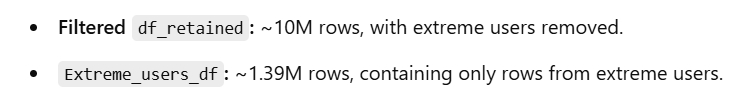

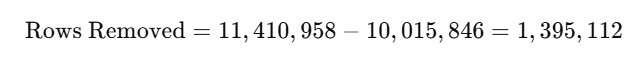

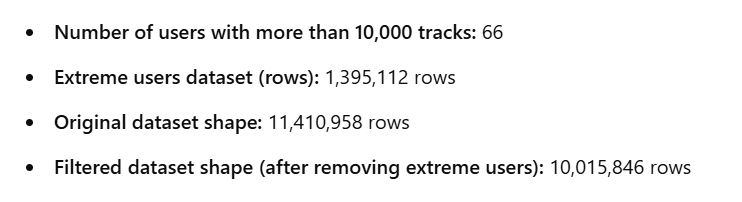

In [ ]:
print(df_retained.columns)
print(extreme_users_df.columns)


Index(['user_id', 'artistname', 'trackname', 'playlistname', 'user_weight'], dtype='object')
Index(['user_id', 'artistname', 'trackname', 'playlistname', 'user_weight'], dtype='object')


In [ ]:
extreme_user_ids = user_track_counts[user_track_counts > 10000].index
print(f"Extreme User IDs: {extreme_user_ids}")
print(extreme_users_df['user_id'].nunique())  # Check if it matches 66


Extreme User IDs: Index(['00123e0f544dee3ab006aa7f1e5725a7', '05422749e89268463444e00ddea1faf1',
       '0d2ab594e618cd02b12cea190bd19bdc', '0e8a2028b0ca919a288924dea8719973',
       '1039e5bfd726bb324ce7f5ea2d0d6fc4', '11da254d9d1948488318e3ea286bf484',
       '139c408e52a497aac29753125d65b0ae', '1c923257b8b90ff1760cb92fb28aaa32',
       '1e83ee751379a76633915ffce34e9647', '22cd1234e26a76c179ad62f6d08f7294',
       '280b75289c00a3b31c9a392ea96e79f8', '2e7291dab286ee7a5135a89e69c5cd8d',
       '2fa1f93e57cfe2f6c4456e98da54061c', '3196442b472af9bbb51e1628ca3c188a',
       '32b524ed367b1e5a714228fbec80849d', '3f30047abd0b82240c0861a63e07255a',
       '4398de6902abde3351347b048fcdc287', '479b70f0fa04f20af57002cc34b025f0',
       '48da4a7b1a0ff8f0d605b6565971816b', '4d98b75af2c5f1d41d75afeee395374e',
       '5968fe6ff4531c2efd244584f35ea94a', '61baddf7207fea410abdc56e680fa869',
       '63a104c619db7621d3258678842d37c0', '6752faf971cd451d87b270621979e2d5',
       '6b85a8076b4f3b1036ef15f09e

In [ ]:
user_track_counts = df_retained.groupby('user_id')['trackname'].count()
extreme_user_ids = user_track_counts[user_track_counts > 10000].index

# Filter the extreme users
extreme_users_df = df_retained[df_retained['user_id'].isin(extreme_user_ids)]
print(extreme_users_df['user_id'].nunique())  # Should match 66


66


In [ ]:
# Calculate the trackname count per user in the filtered dataframe
user_track_counts_filtered = df_retained_filtered.groupby('user_id')['trackname'].count()

# Find the maximum trackname count
max_trackname_count = user_track_counts_filtered.max()

print(f"Maximum trackname count per user after filtering extreme users: {max_trackname_count}")


Maximum trackname count per user after filtering extreme users: 9900


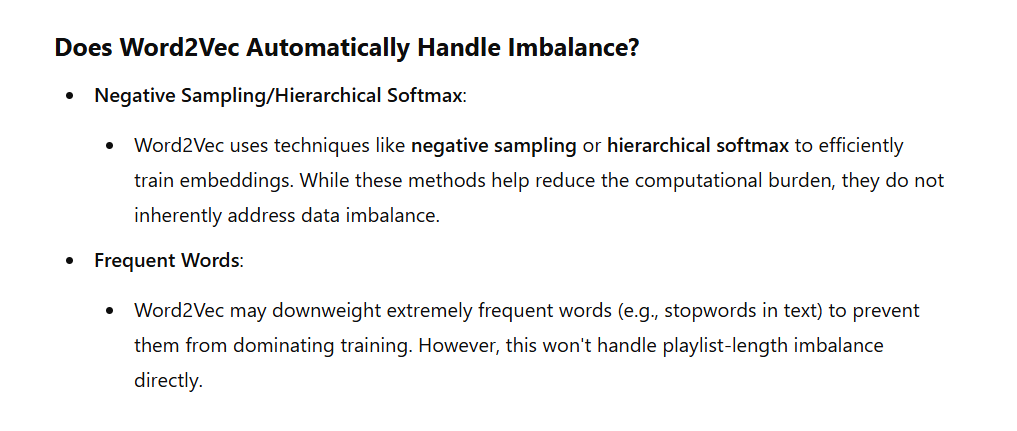

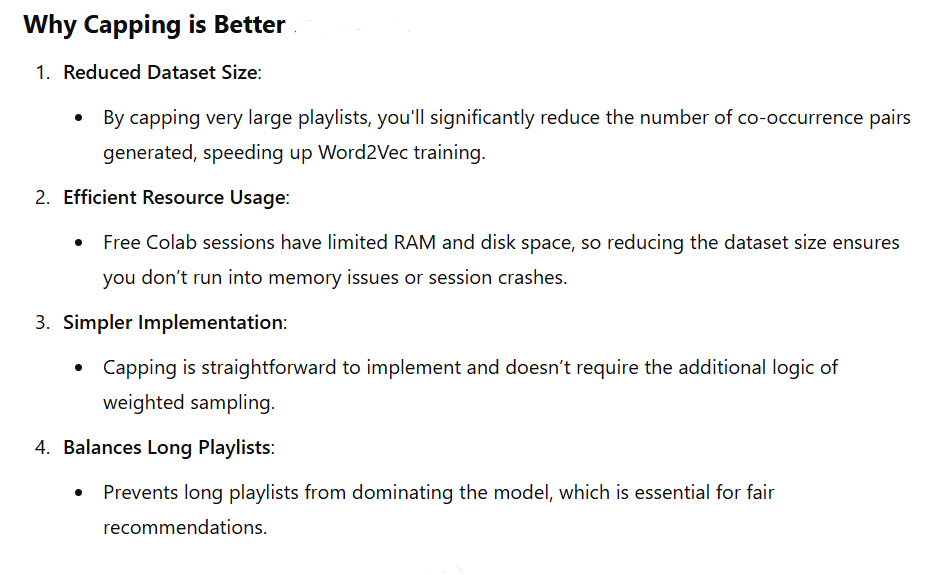

**We need to use capping (instead of weighting) and risk of losing some data, because of low computational resources (running on free version of Google Colab doesn't give much GPU)**

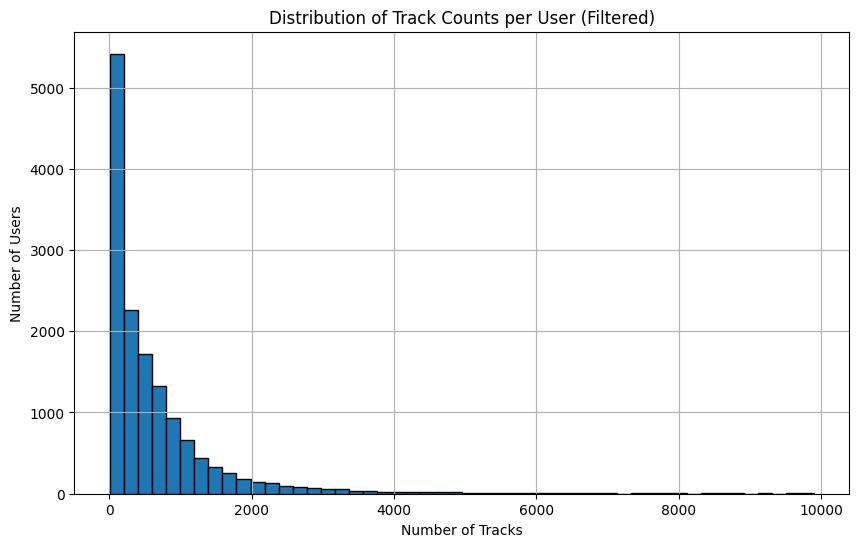

In [ ]:
user_track_counts_filtered.hist(bins=50, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Track Counts per User (Filtered)')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Users')
plt.show()


### **Removed data so far during cleanup +preprocess+ preparation:**

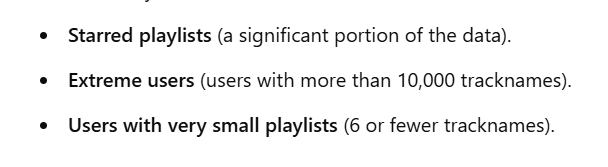

### In the current situation where there is still imbalance in trackname data there are 2 options :

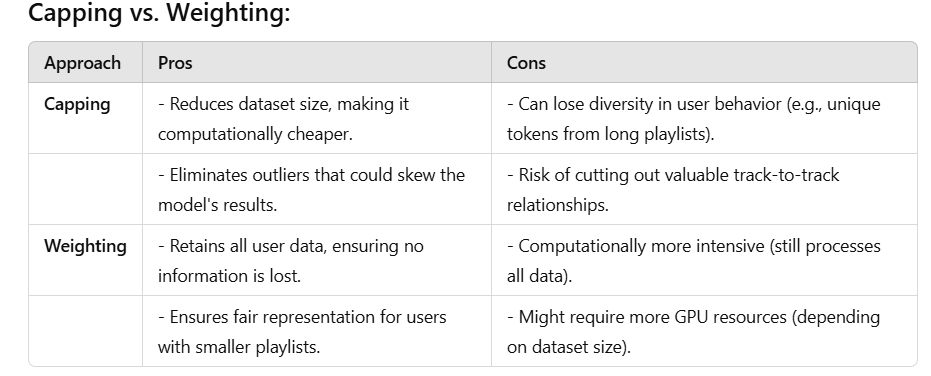

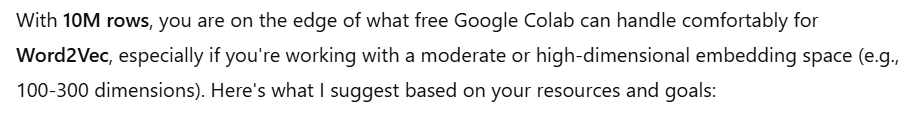

### Recalculate user weights by combining playlists and track counts

recalculating weights by combining playlists and track counts can give a more holistic balance. This approach ensures that both aspects (the number of playlists a user creates and the number of tracks they add) are taken into account, making the dataset fairer for training the Word2Vec model.



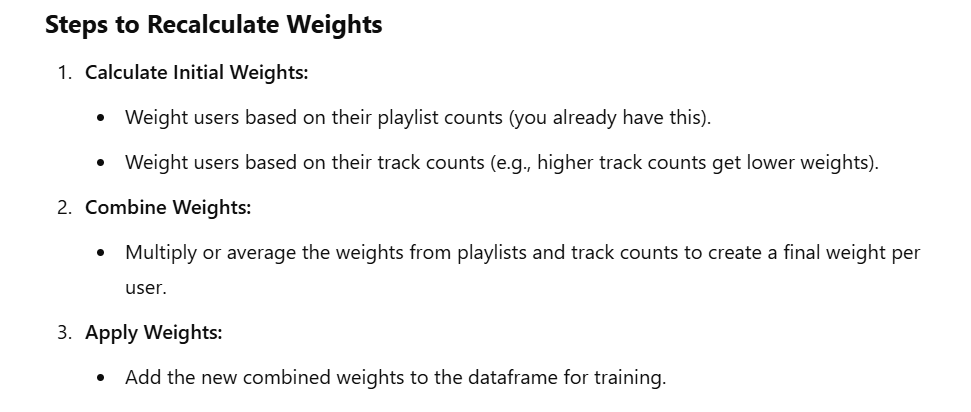

In [ ]:
import numpy as np

# Step 1: Load the dataset
df_retained_filtered = pd.read_csv('df_retained_filtered.csv')

# Step 2: Calculate playlist-based weights (already done earlier, but repeating for clarity)
user_playlist_counts = df_retained_filtered.groupby('user_id')['playlistname'].nunique()
playlist_weights = (1 / np.sqrt(user_playlist_counts)).to_dict()

# Step 3: Calculate track-based weights
user_track_counts = df_retained_filtered.groupby('user_id')['trackname'].count()
track_weights = (1 / np.sqrt(user_track_counts)).to_dict()

# Step 4: Combine weights (average of both weights)
combined_weights = {user_id: (playlist_weights.get(user_id, 0) + track_weights.get(user_id, 0)) / 2
                    for user_id in set(playlist_weights) | set(track_weights)}

# Step 5: Add weights to the dataframe
df_retained_filtered['combined_weight'] = df_retained_filtered['user_id'].map(combined_weights)

# Step 6: Save the weighted dataset
df_retained_filtered.to_csv('df_retained_filtered_with_weights.csv', index=False)
print("Weighted dataset saved: df_retained_filtered_with_weights.csv")


Weighted dataset saved: df_retained_filtered_with_weights.csv


# Direct link to 'df_retained_filtered_with_weights.csv'    final before tokenizing + Analyzing

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1UkWF9iJcjo5l3EQs7e6hkrg3c2Khkf-D'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'df_retained_filtered_with_weights.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1UkWF9iJcjo5l3EQs7e6hkrg3c2Khkf-D
From (redirected): https://drive.google.com/uc?export=download&id=1UkWF9iJcjo5l3EQs7e6hkrg3c2Khkf-D&confirm=t&uuid=a8307019-ac39-4269-85b9-e78a7c5d8fec
To: /content/df_retained_filtered_with_weights.csv
100%|██████████| 1.20G/1.20G [00:17<00:00, 69.1MB/s]


'df_retained_filtered_with_weights.csv'

In [ ]:
import numpy as np

# Step 1: Load the dataset
df_retained_filtered_with_weights = pd.read_csv('df_retained_filtered_with_weights.csv')

In [ ]:
# Load the weighted dataset
df_retained_filtered_with_weights = pd.read_csv('df_retained_filtered_with_weights.csv')

# Display the shape of the dataset
print("Shape of the dataset:", df_retained_filtered_with_weights.shape)

# Display the info of the dataset
print("\nDataset Info:")
print(df_retained_filtered_with_weights.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df_retained_filtered_with_weights.head())


Shape of the dataset: (10008812, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008812 entries, 0 to 10008811
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          object 
 1   artistname       object 
 2   trackname        object 
 3   playlistname     object 
 4   user_weight      float64
 5   combined_weight  float64
dtypes: float64(2), object(4)
memory usage: 458.2+ MB
None

First 5 Rows:
                            user_id                       artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                     tiffany page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   

                                          trackname    playlistname  \
0                

In [ ]:
# Display column names
print(df_retained_filtered_with_weights.columns)


Index(['user_id', 'artistname', 'trackname', 'playlistname', 'user_weight',
       'combined_weight'],
      dtype='object')


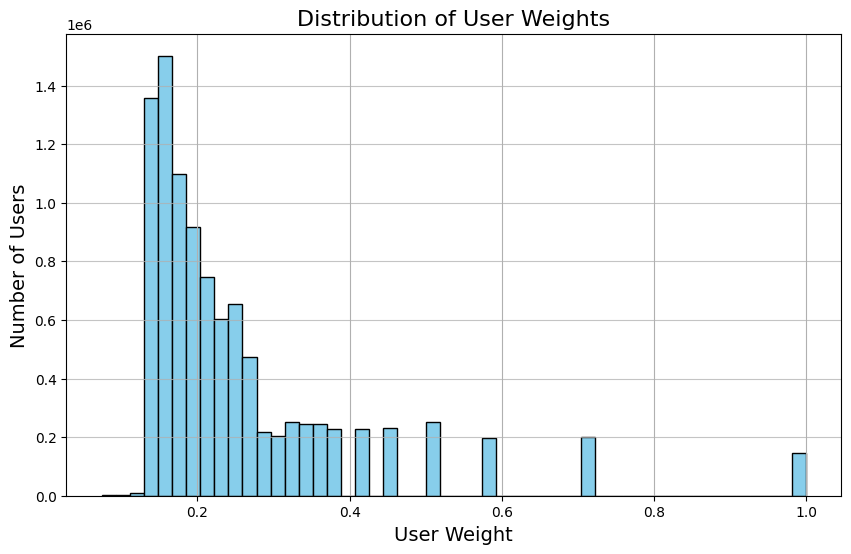

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of weights
plt.figure(figsize=(10, 6))
df_retained_filtered_with_weights['user_weight'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of User Weights", fontsize=16)
plt.xlabel("User Weight", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


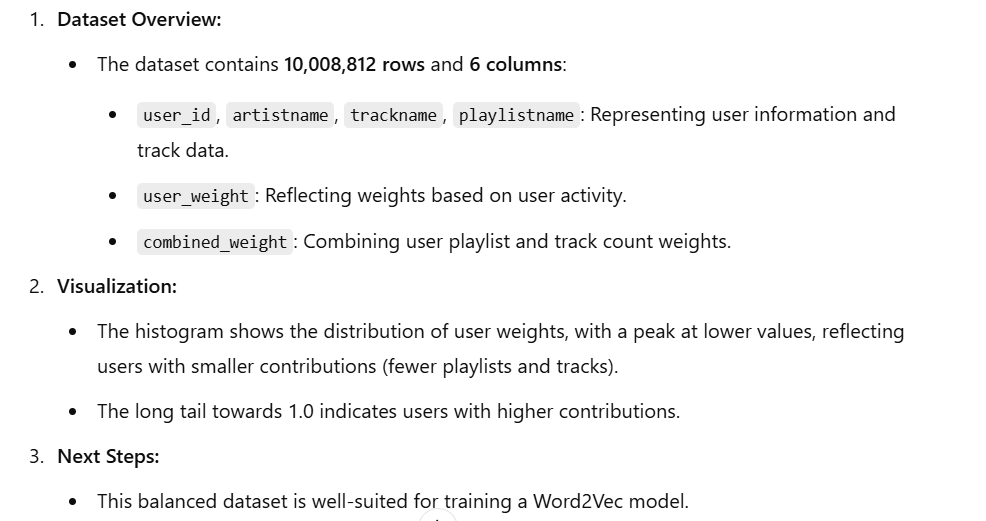

# Removing blank track names such as " "

In [ ]:
# Check for missing or empty tracknames
empty_tracknames = df_retained_filtered_with_weights['trackname'].isnull().sum()
blank_tracknames = (df_retained_filtered_with_weights['trackname'].str.strip() == '').sum()

print(f"Number of missing tracknames: {empty_tracknames}")
print(f"Number of blank (empty string) tracknames: {blank_tracknames}")

# Display rows with empty or blank tracknames
if empty_tracknames > 0 or blank_tracknames > 0:
    print("\nRows with missing or blank tracknames:")
    print(df_retained_filtered_with_weights[df_retained_filtered_with_weights['trackname'].isnull() | (df_retained_filtered_with_weights['trackname'].str.strip() == '')])
else:
    print("No missing or blank tracknames found.")


Number of missing tracknames: 0
Number of blank (empty string) tracknames: 186

Rows with missing or blank tracknames:
                                  user_id                       artistname  \
6634     50346e4190d1707ebc6b39a95f86927a                    nobuo uematsu   
98262    c4397b41b68a636a810517e59f6a476b                   hundred waters   
110314   250b36ff8b1502104ea0615f9023f5be                  verka serduchka   
233789   cf2f50c728306256e274fc536c9ac9ed  gteborgs symfoniettatomas blank   
249241   a879e989ddc0b2325c6255cf77a77d44                         glykeria   
...                                   ...                              ...   
9699542  89d1fe9afb0703e6f971f1357a3ef2a3                             sfdk   
9732040  b0a59241c8dd59faba9a28741cf5cfed                               iu   
9920313  1d7a6816a47881ad65c4d0fb65b49c41                   hundred waters   
9933403  a6c4715c5a225cc942500b1ea7e56aa0                             sfdk   
9993577  4a5b8338cbe3a8

In [ ]:
# Remove rows with blank (empty string) tracknames
df_retained_filtered_with_weights = df_retained_filtered_with_weights[df_retained_filtered_with_weights['trackname'].str.strip() != '']

# Verify the number of rows after removal
print(f"Number of rows after removing blank tracknames: {df_retained_filtered_with_weights.shape[0]}")

# Save the updated dataset to a new file
df_retained_filtered_with_weights.to_csv('df_retained_filtered_with_weights_cleaned.csv', index=False)
print("Cleaned dataset saved: df_retained_filtered_with_weights_cleaned.csv")


Number of rows after removing blank tracknames: 10008626
Cleaned dataset saved: df_retained_filtered_with_weights_cleaned.csv


## Step 7: TOKENIZING (Data preparation before modeling word2vec)

### Direct link to 'df_retained_filtered_with_weights_cleaned.csv' (last final file before tokenizing)

In [14]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1Or6VOzQq4xcGxmmtIP8KTEiHkY13BbiT'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'df_retained_filtered_with_weights_cleaned.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1Or6VOzQq4xcGxmmtIP8KTEiHkY13BbiT
From (redirected): https://drive.google.com/uc?export=download&id=1Or6VOzQq4xcGxmmtIP8KTEiHkY13BbiT&confirm=t&uuid=c9c263f8-d382-4166-8b30-070cd4b870ca
To: /content/df_retained_filtered_with_weights_cleaned.csv
100%|██████████| 1.20G/1.20G [00:16<00:00, 73.1MB/s]


'df_retained_filtered_with_weights_cleaned.csv'

In [16]:
# Load the final saved file
df_clean = pd.read_csv('df_retained_filtered_with_weights_cleaned.csv')

In [ ]:
df_clean.shape

(10008626, 6)

In [ ]:
df_clean.columns

Index(['user_id', 'artistname', 'trackname', 'playlistname', 'user_weight',
       'combined_weight'],
      dtype='object')

## Step-by-Step: Grouping by Artist with Weights



Integrating weights into the artist-based grouping approach ensures that recommendations take user influence (through playlists and track counts) into account. Here's how we can incorporate the weights into the process:

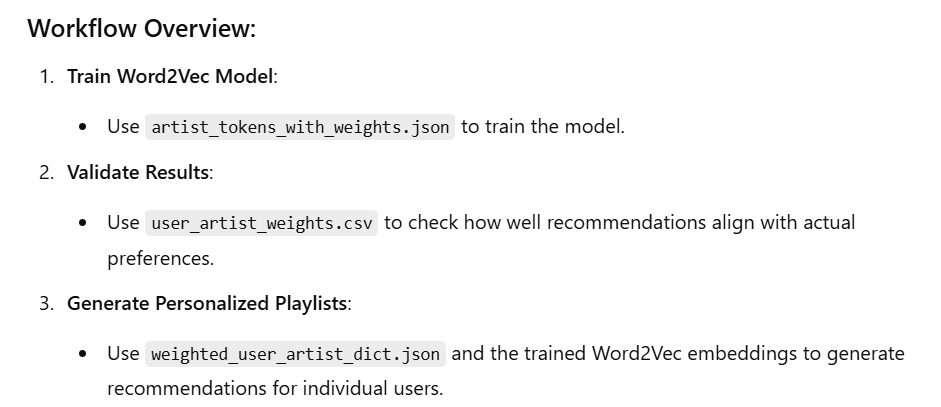

### Step 1: Incorporate Weights in Grouping

The user_weight and combined_weight columns represent user-specific influence.

When grouping by user_id and artistname, we calculate a weighted frequency for each artist's tracks.


In [17]:
# Group by user_id and artistname, aggregating track names into lists and summing weights
user_artist_weights = (
    df_clean.groupby(['user_id', 'artistname'])
    .agg(
        tracklist=('trackname', list),  # Aggregate track names into lists
        user_weight=('user_weight', 'mean'),  # Average user weight for the user-artist pair
        combined_weight=('combined_weight', 'sum')  # Sum of combined weights
    )
    .reset_index()
)

# Verify the results
print(user_artist_weights.head())


                            user_id           artistname  \
0  00055176fea33f6e027cd3302289378b  5 seconds of summer   
1  00055176fea33f6e027cd3302289378b      abigail breslin   
2  00055176fea33f6e027cd3302289378b  against the current   
3  00055176fea33f6e027cd3302289378b         all time low   
4  00055176fea33f6e027cd3302289378b                auryn   

                                           tracklist  user_weight  \
0  [disconnected, dont stop  acoustic, english lo...          1.0   
1                                         [you suck]          1.0   
2  [another you another way, closer faster, gravity]          1.0   
3  [backseat serenade, break your little heart, d...          1.0   
4                              [saturday im in love]          1.0   

   combined_weight  
0         5.456435  
1         0.545644  
2         1.636931  
3         4.365148  
4         0.545644  


### Step 2: Create a Weighted User-Artist Dictionary
Use the user_weight or combined_weight to adjust the importance of each user's tracks.

In [18]:
from collections import defaultdict

# Initialize dictionary
weighted_user_artist_dict = defaultdict(dict)

# Populate the dictionary
for _, row in user_artist_weights.iterrows():
    user_id = row['user_id']
    artist = row['artistname']
    tracks = row['tracklist']
    weight = row['combined_weight']  # Choose the weight you want to prioritize
    weighted_user_artist_dict[user_id][artist] = {'tracks': tracks, 'weight': weight}

# Verify the structure of one user
example_user = list(weighted_user_artist_dict.keys())[0]
print(f"Example User ({example_user}):", weighted_user_artist_dict[example_user])


Example User (00055176fea33f6e027cd3302289378b): {'5 seconds of summer': {'tracks': ['disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason'], 'weight': 5.4564354645876385}, 'abigail breslin': {'tracks': ['you suck'], 'weight': 0.5456435464587639}, 'against the current': {'tracks': ['another you another way', 'closer faster', 'gravity'], 'weight': 1.6369306393762917}, 'all time low': {'tracks': ['backseat serenade', 'break your little heart', 'dear maria count me in', 'jasey rae', 'merry christmas kiss my ass', 'somethings gotta give', 'the reckless and the brave', 'therapy'], 'weight': 4.365148371670111}, 'auryn': {'tracks': ['saturday im in love'], 'weight': 0.5456435464587639}, 'austin mahone': {'tracks': ['what about love'], 'weight': 0.5456435464587639}, 'avril lavigne': {'tracks': ['girlfriend', 'heres to never growing up

### Step 3.1: Tokenize Tracks with Weights (Step 1 in tokenizing, later on this step needs adjustments after analyzing the tokens, look at step 3.2 at the end of notebook)
When preparing tokens for Word2Vec, use weights to repeat tracks or adjust their presence in the tokenized dataset.

In [ ]:
import json

# Open a file to save tokens incrementally
with open('artist_tokens_with_weights.json', 'w') as f:
    f.write('[')  # Start the JSON list

    for user_id, artist_dict in weighted_user_artist_dict.items():
        for artist, data in artist_dict.items():
            tracks = data['tracks']
            weight = data['weight']

            # Repeat tracks based on weight
            weighted_tracks = tracks * int(round(weight * 10))  # Scale weight for repetition

            # Write the weighted tracks as a JSON array
            json.dump(weighted_tracks, f)
            f.write(',')  # Add a comma after each chunk

    f.seek(f.tell() - 1, 0)  # Remove the last comma
    f.write(']')  # End the JSON list

print("Weighted tokens for Word2Vec saved as 'artist_tokens_with_weights.json'.")


Weighted tokens for Word2Vec saved as 'artist_tokens_with_weights.json'.


## Realizing that i should devide to chunks because the full artist_token_with_weights.json is 11 GB and even upluading with gdown has its limits. so this is the chunky munky new code for tokens: (each chunk is 500 MB)

In [9]:
import json
import os

# Define the chunk size (500 MB)
chunk_size_limit = 500 * 1024 * 1024  # 500 MB in bytes
output_dir = './chunks/'  # Directory to save chunk files
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Initialize variables
chunk_index = 1
current_chunk_size = 0
current_chunk = []

# Start processing weighted tokens
for user_id, artist_dict in weighted_user_artist_dict.items():
    for artist, data in artist_dict.items():
        tracks = data['tracks']
        weight = data['weight']

        # Repeat tracks based on weight
        weighted_tracks = tracks * int(round(weight * 10))  # Scale weight for repetition

        # Serialize the weighted tracks to JSON and calculate its size
        serialized_record = json.dumps(weighted_tracks)
        record_size = len(serialized_record.encode('utf-8'))

        # Check if adding this record exceeds the chunk size
        if current_chunk_size + record_size > chunk_size_limit:
            # Save the current chunk to a file
            output_file = os.path.join(output_dir, f'artist_tokens_chunk_{chunk_index}.json')
            with open(output_file, 'w') as f:
                f.write('[')  # Start the JSON list
                f.write(','.join(current_chunk))  # Write all records in the current chunk
                f.write(']')  # End the JSON list

            print(f"Chunk {chunk_index} saved with size: {current_chunk_size / (1024 * 1024):.2f} MB")

            # Reset for the next chunk
            chunk_index += 1
            current_chunk_size = 0
            current_chunk = []

        # Add the serialized record to the current chunk
        current_chunk.append(serialized_record)
        current_chunk_size += record_size

# Save the last chunk if it has data
if current_chunk:
    output_file = os.path.join(output_dir, f'artist_tokens_chunk_{chunk_index}.json')
    with open(output_file, 'w') as f:
        f.write('[')  # Start the JSON list
        f.write(','.join(current_chunk))  # Write all records in the current chunk
        f.write(']')  # End the JSON list

    print(f"Chunk {chunk_index} saved with size: {current_chunk_size / (1024 * 1024):.2f} MB")

print(f"All chunks saved to {output_dir}")


Chunk 1 saved with size: 499.76 MB
Chunk 2 saved with size: 240.20 MB
Chunk 3 saved with size: 634.66 MB
Chunk 4 saved with size: 499.99 MB
Chunk 5 saved with size: 486.17 MB
Chunk 6 saved with size: 499.74 MB
Chunk 7 saved with size: 498.03 MB
Chunk 8 saved with size: 499.97 MB
Chunk 9 saved with size: 500.00 MB
Chunk 10 saved with size: 499.70 MB
Chunk 11 saved with size: 499.96 MB
Chunk 12 saved with size: 499.83 MB
Chunk 13 saved with size: 499.90 MB
Chunk 14 saved with size: 466.00 MB
Chunk 15 saved with size: 499.62 MB
Chunk 16 saved with size: 499.88 MB
Chunk 17 saved with size: 498.81 MB
Chunk 18 saved with size: 499.90 MB
Chunk 19 saved with size: 499.45 MB
Chunk 20 saved with size: 496.52 MB
Chunk 21 saved with size: 499.92 MB
Chunk 22 saved with size: 448.82 MB
Chunk 23 saved with size: 500.00 MB
Chunk 24 saved with size: 496.46 MB
Chunk 25 saved with size: 499.93 MB
Chunk 26 saved with size: 16.01 MB
All chunks saved to ./chunks/


In [10]:
import shutil

# Define the directory and output zip file name
chunk_dir = './chunks'
zip_file = 'artist_tokens_chunks.zip'

# Compress the directory
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', chunk_dir)

print(f"Directory {chunk_dir} compressed to {zip_file}")


Directory ./chunks compressed to artist_tokens_chunks.zip


# Direct link to artist_tokens_chunks.zip (containing all artist_tokens_with_weights.json devided into small chunks)

In [1]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '12G5gByjOh7NsUhzr_8i0h-m7BdUoKfyg'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'artist_tokens_chunks.zip'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=12G5gByjOh7NsUhzr_8i0h-m7BdUoKfyg
From (redirected): https://drive.google.com/uc?export=download&id=12G5gByjOh7NsUhzr_8i0h-m7BdUoKfyg&confirm=t&uuid=b66a4572-753d-4e5d-b51f-e82fa04c9e78
To: /content/artist_tokens_chunks.zip
100%|██████████| 671M/671M [00:14<00:00, 45.6MB/s]


'artist_tokens_chunks.zip'

### Step 4: Save Intermediate Outputs


In [ ]:
# Save user-artist-weighted grouped data
user_artist_weights.to_csv('user_artist_weights.csv', index=False)
print("User-artist-weight mapping saved as 'user_artist_weights.csv'.")

# Save the weighted user-artist dictionary
with open('weighted_user_artist_dict.json', 'w') as f:
    json.dump(weighted_user_artist_dict, f)

print("Weighted user-artist dictionary saved as 'weighted_user_artist_dict.json'.")


User-artist-weight mapping saved as 'user_artist_weights.csv'.
Weighted user-artist dictionary saved as 'weighted_user_artist_dict.json'.


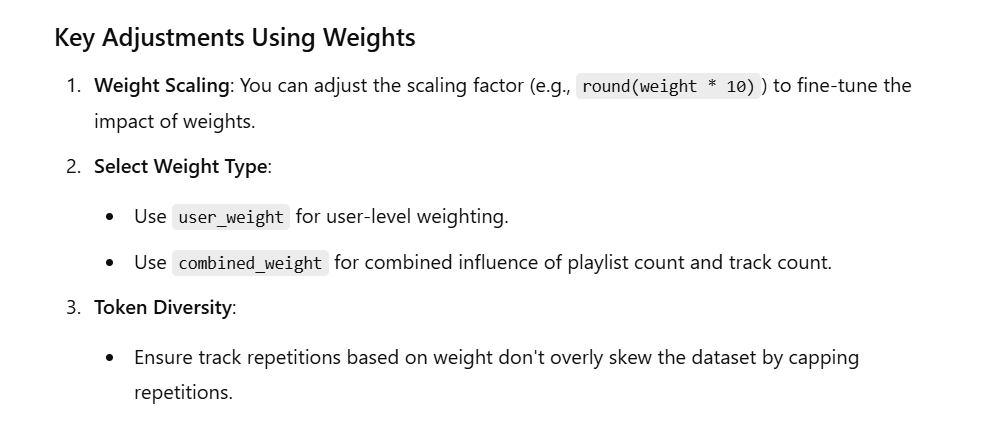

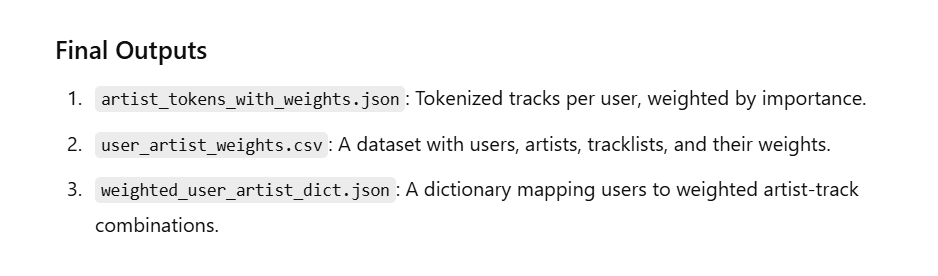

Step 8 : WORD2VEC model

## Direct link to all 3 files in tokenizing process

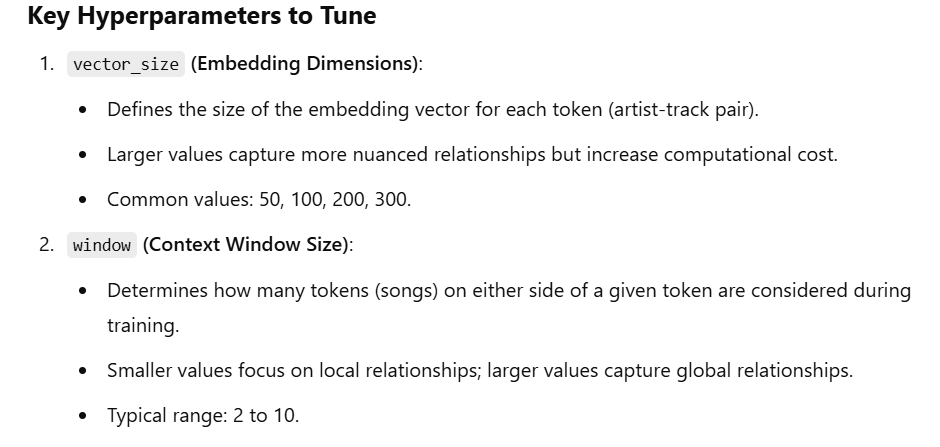

In [10]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1fjmDxhIQ_JVHK2trzI5KPsUNB_XUxe7W'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'weighted_user_artist_dict.json'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1fjmDxhIQ_JVHK2trzI5KPsUNB_XUxe7W
From (redirected): https://drive.google.com/uc?export=download&id=1fjmDxhIQ_JVHK2trzI5KPsUNB_XUxe7W&confirm=t&uuid=393900eb-3efc-4084-949b-fa66877d07b5
To: /content/weighted_user_artist_dict.json
100%|██████████| 396M/396M [00:10<00:00, 38.3MB/s]


'weighted_user_artist_dict.json'

In [11]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1A3N2QnJc6YzHRyUOYw9PkpRMKZhvr8MJ'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'user_artist_weights.csv'
# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1A3N2QnJc6YzHRyUOYw9PkpRMKZhvr8MJ
From (redirected): https://drive.google.com/uc?export=download&id=1A3N2QnJc6YzHRyUOYw9PkpRMKZhvr8MJ&confirm=t&uuid=b1d72715-41db-43b7-aa15-2740cd43f060
To: /content/user_artist_weights.csv
100%|██████████| 464M/464M [00:09<00:00, 51.0MB/s]


'user_artist_weights.csv'

# Direct link to artist_tokens_checks.zip (tokens for the model are devided into mini jasons to feed the model)

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '12G5gByjOh7NsUhzr_8i0h-m7BdUoKfyg'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'artist_tokens_chunks.zip'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=12G5gByjOh7NsUhzr_8i0h-m7BdUoKfyg
From (redirected): https://drive.google.com/uc?export=download&id=12G5gByjOh7NsUhzr_8i0h-m7BdUoKfyg&confirm=t&uuid=b66a4572-753d-4e5d-b51f-e82fa04c9e78
To: /content/artist_tokens_chunks.zip
100%|██████████| 671M/671M [00:14<00:00, 45.6MB/s]


'artist_tokens_chunks.zip'

## Extraction of 26 mini jasons of tokens :

In [2]:
import zipfile

# Path to the downloaded ZIP file
zip_file_path = 'artist_tokens_chunks.zip'
extract_to_path = 'artist_tokens_chunks/'  # Directory to extract files

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction completed!")


Extraction completed!


In [3]:
import os

# List files in the extracted directory
extracted_files = os.listdir(extract_to_path)
print(f"Extracted files: {extracted_files}")


Extracted files: ['artist_tokens_chunk_16.json', 'artist_tokens_chunk_25.json', 'artist_tokens_chunk_21.json', 'artist_tokens_chunk_1.json', 'artist_tokens_chunk_20.json', 'artist_tokens_chunk_22.json', 'artist_tokens_chunk_6.json', 'artist_tokens_chunk_3.json', 'artist_tokens_chunk_24.json', 'artist_tokens_chunk_18.json', 'artist_tokens_chunk_26.json', 'artist_tokens_chunk_7.json', 'artist_tokens_chunk_11.json', 'artist_tokens_chunk_19.json', 'artist_tokens_chunk_8.json', 'artist_tokens_chunk_2.json', 'artist_tokens_chunk_15.json', 'artist_tokens_chunk_4.json', 'artist_tokens_chunk_10.json', 'artist_tokens_chunk_17.json', 'artist_tokens_chunk_5.json', 'artist_tokens_chunk_23.json', 'artist_tokens_chunk_9.json', 'artist_tokens_chunk_13.json', 'artist_tokens_chunk_14.json', 'artist_tokens_chunk_12.json']


In [4]:
import json

# Load and inspect a sample file
sample_file = os.path.join(extract_to_path, extracted_files[0])  # Load the first file
with open(sample_file, 'r') as f:
    data = json.load(f)

print(f"Sample data from {sample_file}: {data[:10]}")  # Print a sample of the data


Sample data from artist_tokens_chunks/artist_tokens_chunk_16.json: [['the christmas waltz  2004 digital remaster', 'you dont know how glad i am  2002  remaster', 'a sleepin bee', 'alfie  2006 digital remaster', 'all of you  1995 digital remaster', 'almost in your arms', 'angel eyes  1994 digital remaster', 'at long last love  1995  remaster', 'back in your own back yard  digitally remastered 93', 'bewitched', 'blue prelude', 'by myself  digitally remastered 96', 'darn that dream', 'days of wine and roses  2006 digital remaster', 'dearly beloved', 'dearly beloved  1992 digital remaster', 'did i remember  2006 digital remaster', 'dont go to strangers  digitally remastered 96', 'dont take your love from me  remaster', 'fly me to the moon in other words  1996 digital remaster', 'gee baby aint i good to you  digitally remastered 96', 'glad to be unhappy  2001 digital remaster', 'happy talk', 'hello dolly', 'i thought about you', 'i wanna be loved  2002 digital remaster', 'ill never stop lov

### To ensure the artist names are there, we can inspect a portion of the data:

Tokens Are Just Track Names: If the tokens are only the track names, you won't find explicit artist names directly in this file. However, the tracks were generated with weights from the weighted_user_artist_dict. So, the artist names were "implied" during the token creation process.

In [8]:
# Inspect the length and a sample of the token data
print(f"Number of tokens: {len(data)}")
print("Sample token:", data[:5])


Number of tokens: 102612
Sample token: [['disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say',

If your goal is to create user-personalized playlists and ensure that the model understands the relationship between artists and tracks, then you must include artist context during token creation.

## Step 3.2 - back to step 3.1 - Modifying the tokens to concatenated [artist_name : track_name] because for personalized playlists "artists" content is very important to depict a user behaviour, so an implied option of tokens like before just don't cut it !!

this code is for full file, but like before it will be too big so move to the next block for creating the tokens in chunks !!

In [7]:
import json

# Load a single JSON chunk file
file_path = '/content/artist_tokens_chunks/artist_tokens_chunk_1.json'  # Replace with the actual path
with open(file_path, 'r') as f:
    data = json.load(f)

# Print the first 10 items for inspection
print("Sample tokens:", data[:10])


Sample tokens: [['disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say

In [19]:
import json

# Open a file to save tokens incrementally
with open('artist_tokens_with_weights.json', 'w') as f:
    f.write('[')  # Start the JSON list

    for user_id, artist_dict in weighted_user_artist_dict.items():
        for artist, data in artist_dict.items():
            tracks = data['tracks']
            weight = data['weight']

            # Generate tokens in the format "artist_name:track_name"
            weighted_tokens = [f"{artist}:{track}" for track in tracks] * int(round(weight * 5))  # Scale weight by 5

            # Write the weighted tokens as a JSON array
            json.dump(weighted_tokens, f)
            f.write(',')  # Add a comma after each chunk

    f.seek(f.tell() - 1, 0)  # Remove the last comma
    f.write(']')  # End the JSON list

print("Weighted tokens for Word2Vec saved as 'artist_tokens_with_weights.json'.")


KeyboardInterrupt: 

### Creating the tokens [artist_name : track_name] in chunks:

In [21]:
import json
import os

# Define the chunk size (500 MB)
chunk_size_limit = 500 * 1024 * 1024  # 500 MB in bytes
output_dir = './chunks_modified/'  # Directory to save chunk files
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Initialize variables
chunk_index = 1
current_chunk_size = 0
current_chunk = []

# Start processing weighted tokens
for user_id, artist_dict in weighted_user_artist_dict.items():
    for artist, data in artist_dict.items():
        tracks = data['tracks']
        weight = data['weight']

        # Generate tokens in the format "artist_name:track_name" and repeat based on weight
        weighted_tokens = [f"{artist}:{track}" for track in tracks] * int(round(weight * 5))  # Scale weight by 5

        # Serialize the weighted tokens to JSON and calculate its size
        serialized_record = json.dumps(weighted_tokens)
        record_size = len(serialized_record.encode('utf-8'))

        # Check if adding this record exceeds the chunk size
        if current_chunk_size + record_size > chunk_size_limit:
            # Save the current chunk to a file
            output_file = os.path.join(output_dir, f'artist_tokens_chunk_modified_{chunk_index}.json')
            with open(output_file, 'w') as f:
                f.write('[')  # Start the JSON list
                f.write(','.join(current_chunk))  # Write all records in the current chunk
                f.write(']')  # End the JSON list

            print(f"Chunk {chunk_index} saved with size: {current_chunk_size / (1024 * 1024):.2f} MB")

            # Reset for the next chunk
            chunk_index += 1
            current_chunk_size = 0
            current_chunk = []

        # Add the serialized record to the current chunk
        current_chunk.append(serialized_record)
        current_chunk_size += record_size

# Save the last chunk if it has data
if current_chunk:
    output_file = os.path.join(output_dir, f'artist_tokens_chunk_modified_{chunk_index}.json')
    with open(output_file, 'w') as f:
        f.write('[')  # Start the JSON list
        f.write(','.join(current_chunk))  # Write all records in the current chunk
        f.write(']')  # End the JSON list

    print(f"Chunk {chunk_index} saved with size: {current_chunk_size / (1024 * 1024):.2f} MB")

print(f"All chunks saved to {output_dir}")


Chunk 1 saved with size: 499.84 MB
Chunk 2 saved with size: 500.00 MB
Chunk 3 saved with size: 499.99 MB
Chunk 4 saved with size: 499.65 MB
Chunk 5 saved with size: 499.83 MB
Chunk 6 saved with size: 499.99 MB
Chunk 7 saved with size: 500.00 MB
Chunk 8 saved with size: 498.92 MB
Chunk 9 saved with size: 499.91 MB
Chunk 10 saved with size: 494.81 MB
Chunk 11 saved with size: 486.99 MB
Chunk 12 saved with size: 500.00 MB
Chunk 13 saved with size: 487.82 MB
Chunk 14 saved with size: 499.95 MB
Chunk 15 saved with size: 499.93 MB
Chunk 16 saved with size: 498.70 MB
Chunk 17 saved with size: 498.20 MB
Chunk 18 saved with size: 499.93 MB
Chunk 19 saved with size: 359.52 MB
All chunks saved to ./chunks_modified/


In [22]:
import shutil

# Define the directory and output zip file name
chunk_dir = './chunks_modified'
zip_file = 'artist_tokens_chunks_modified.zip'

# Compress the directory
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', chunk_dir)

print(f"Directory {chunk_dir} compressed to {zip_file}")


Directory ./chunks_modified compressed to artist_tokens_chunks_modified.zip


# Direct link to artist_tokens_chunks_modified.zip

In [23]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1NajTCvKe714wR0B0nDhJxpDJoqf9LlpP'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'artist_tokens_chunks_modified.zip'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1NajTCvKe714wR0B0nDhJxpDJoqf9LlpP
From (redirected): https://drive.google.com/uc?export=download&id=1NajTCvKe714wR0B0nDhJxpDJoqf9LlpP&confirm=t&uuid=9b03b633-3c51-4f19-a2fc-e1ea041a753e
To: /content/artist_tokens_chunks_modified.zip
100%|██████████| 510M/510M [00:11<00:00, 43.6MB/s]


'artist_tokens_chunks_modified.zip'

## Extraction of 19 mini jasons of tokens :

In [24]:
import zipfile

# Path to the downloaded ZIP file
zip_file_path = 'artist_tokens_chunks_modified.zip'
extract_to_path = 'artist_tokens_chunks_modified/'  # Directory to extract files

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction completed!")

Extraction completed!


## Analyzing the modified tokens

In [25]:
import os

# List files in the extracted directory
extracted_files = os.listdir(extract_to_path)
print(f"Extracted files: {extracted_files}")

Extracted files: ['artist_tokens_chunk_modified_15.json', 'artist_tokens_chunk_modified_10.json', 'artist_tokens_chunk_modified_8.json', 'artist_tokens_chunk_modified_11.json', 'artist_tokens_chunk_modified_14.json', 'artist_tokens_chunk_modified_1.json', 'artist_tokens_chunk_modified_13.json', 'artist_tokens_chunk_modified_17.json', 'artist_tokens_chunk_modified_2.json', 'artist_tokens_chunk_modified_6.json', 'artist_tokens_chunk_modified_7.json', 'artist_tokens_chunk_modified_4.json', 'artist_tokens_chunk_modified_5.json', 'artist_tokens_chunk_modified_16.json', 'artist_tokens_chunk_modified_12.json', 'artist_tokens_chunk_modified_3.json', 'artist_tokens_chunk_modified_19.json', 'artist_tokens_chunk_modified_18.json', 'artist_tokens_chunk_modified_9.json']


In [26]:
import json

# Load and inspect a sample file
sample_file = os.path.join(extract_to_path, extracted_files[0])  # Load the first file
with open(sample_file, 'r') as f:
    data = json.load(f)

print(f"Sample data from {sample_file}: {data[:10]}")  # Print a sample of the data


Sample data from artist_tokens_chunks_modified/artist_tokens_chunk_modified_15.json: [['alejandro sanz:cancin sin emocin', 'alejandro sanz:ellos son asi', 'alejandro sanz:eres mia', 'alejandro sanz:ese que me di la vida', 'alejandro sanz:la fuerza del corazn', 'alejandro sanz:mi soledad y yo', 'alejandro sanz:por bandera', 'alejandro sanz:quiero morir en tu veneno', 'alejandro sanz:se me olvid todo al verte', 'alejandro sanz:lo ves', 'alejandro sanz:lo ves  piano y voz', 'alejandro sanz:a golpes contra el calendario', 'alejandro sanz:como te echo de menos', 'alejandro sanz:los dos cogidos de la mano', 'alejandro sanz:mi primera cancin', 'alejandro sanz:pisando fuerte', 'alejandro sanz:que no te dara yo', 'alejandro sanz:se le apago la luz  version basico', 'alejandro sanz:si tu me miras', 'alejandro sanz:tu letra podre acariciar', 'alejandro sanz:viviendo deprisa', 'alejandro sanz:a la primera persona', 'alejandro sanz:amiga mia', 'alejandro sanz:aquello que me diste', 'alejandro sanz:

In [27]:
# Inspect the length and a sample of the token data
print(f"Number of tokens: {len(data)}")
print("Sample token:", data[:5])

Number of tokens: 110529
Sample token: [['alejandro sanz:cancin sin emocin', 'alejandro sanz:ellos son asi', 'alejandro sanz:eres mia', 'alejandro sanz:ese que me di la vida', 'alejandro sanz:la fuerza del corazn', 'alejandro sanz:mi soledad y yo', 'alejandro sanz:por bandera', 'alejandro sanz:quiero morir en tu veneno', 'alejandro sanz:se me olvid todo al verte', 'alejandro sanz:lo ves', 'alejandro sanz:lo ves  piano y voz', 'alejandro sanz:a golpes contra el calendario', 'alejandro sanz:como te echo de menos', 'alejandro sanz:los dos cogidos de la mano', 'alejandro sanz:mi primera cancin', 'alejandro sanz:pisando fuerte', 'alejandro sanz:que no te dara yo', 'alejandro sanz:se le apago la luz  version basico', 'alejandro sanz:si tu me miras', 'alejandro sanz:tu letra podre acariciar', 'alejandro sanz:viviendo deprisa', 'alejandro sanz:a la primera persona', 'alejandro sanz:amiga mia', 'alejandro sanz:aquello que me diste', 'alejandro sanz:cai  feat nia pastori', 'alejandro sanz:como t

### Step 1: Setup and Load the JSON File



In [ ]:
pip install ijson


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 4.3 MB/s eta 0:00:00


In [ ]:
import ijson

file_path = 'artist_tokens_with_weights.json'

try:
    with open(file_path, 'r') as file:
        # Parse key-value pairs
        parser = ijson.items(file, 'item')
        for i, item in enumerate(parser):
            print(item)  # Print or process each item
            if i >= 10:  # Stop after 10 items for inspection
                break
except Exception as e:
    print(f"An error occurred: {e}")


['disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you dont know', 'just saying', 'long way home', 'long way home  acoustic', 'the only reason', 'disconnected', 'dont stop  acoustic', 'english love affair', 'everything i didnt say', 'everything i didnt say  live', 'if you

In [ ]:
import orjson

file_path = 'artist_tokens_with_weights.json'

with open(file_path, 'r') as file:
    data = orjson.loads(file.read())
tokens = data['item']  # Adjust this based on the structure of your JSON


In [ ]:
import ijson
import time

file_path = 'artist_tokens_with_weights.json'
tokens = []

start_time = time.time()
with open(file_path, 'r') as file:
    parser = ijson.items(file, 'item')
    for i, item in enumerate(parser):
        tokens.append(item)
        if i % 100000 == 0:  # Print progress every 100,000 items
            print(f"Processed {i} items...")

end_time = time.time()
print(f"Loaded {len(tokens)} tokens in {end_time - start_time} seconds.")


In [ ]:
from sklearn.model_selection import train_test_split

train_tokens, val_tokens = train_test_split(tokens, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_tokens)}")
print(f"Validation set size: {len(val_tokens)}")


NameError: name 'tokens' is not defined

### 3. Train the Word2Vec Model

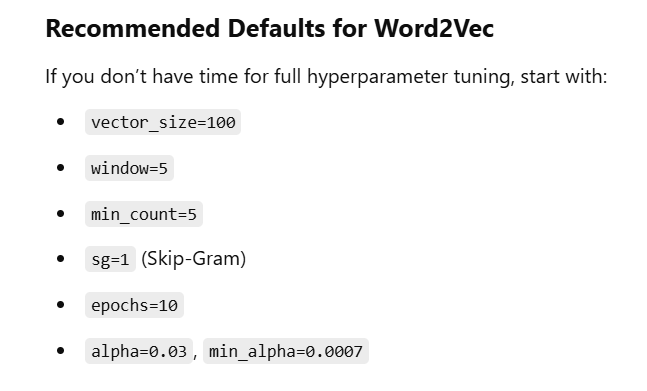

### Incremental Training on Batches (For Large Datasets)

In [ ]:
from gensim.models import Word2Vec

# Define Word2Vec hyperparameters
vector_size = 100  # Embedding dimensions
window = 5         # Context window size
min_count = 2      # Minimum token frequency
workers = 4        # Number of threads
epochs = 10        # Number of training iterations

# Train the model
word2vec_model = Word2Vec(
    sentences=train_tokens,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=workers,
    sg=1,  # Skip-gram (set sg=0 for CBOW)
    epochs=epochs
)

# Save the model for later use
word2vec_model.save("word2vec_artist_model.model")
print("Model training completed and saved.")


### 4. Validate the Model

In [ ]:
# Load the trained model (if not already in memory)
from gensim.models import Word2Vec

model = Word2Vec.load("word2vec_artist_model.model")

# Test some words for similarity
test_words = ['love', 'home', 'night']  # Replace with relevant tokens
for word in test_words:
    if word in model.wv:
        print(f"Words similar to '{word}':")
        print(model.wv.most_similar(word, topn=5))
    else:
        print(f"'{word}' not in vocabulary.")


### 5. Save and Export Word Vectors

In [ ]:
# Save the word vectors in KeyedVectors format
word_vectors = word2vec_model.wv
word_vectors.save("artist_word_vectors.kv")
print("Word vectors saved successfully.")


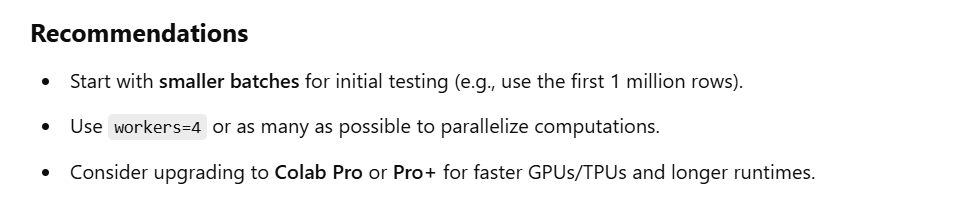

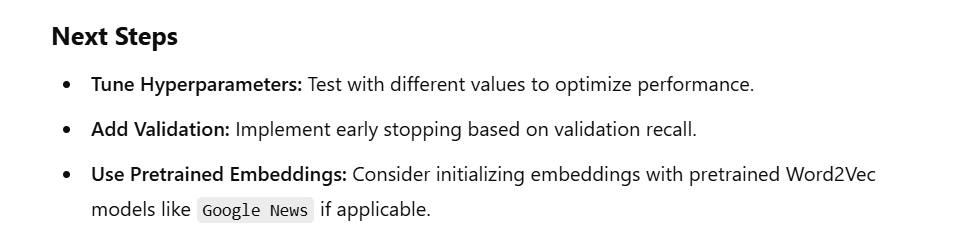

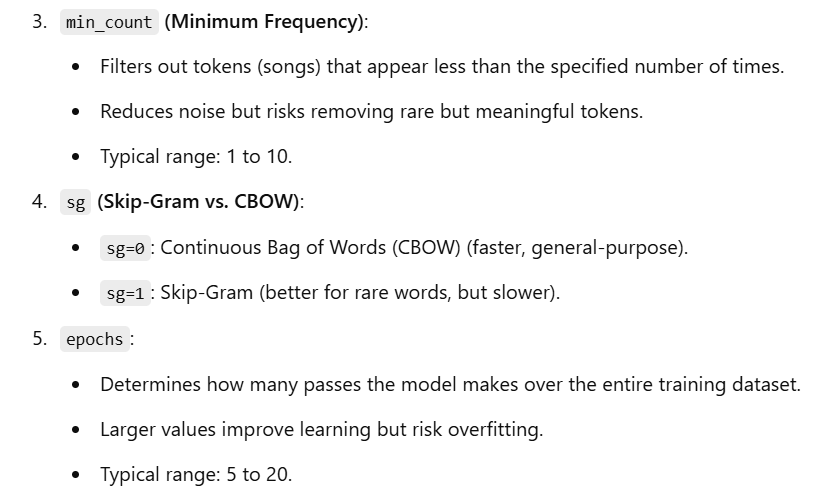

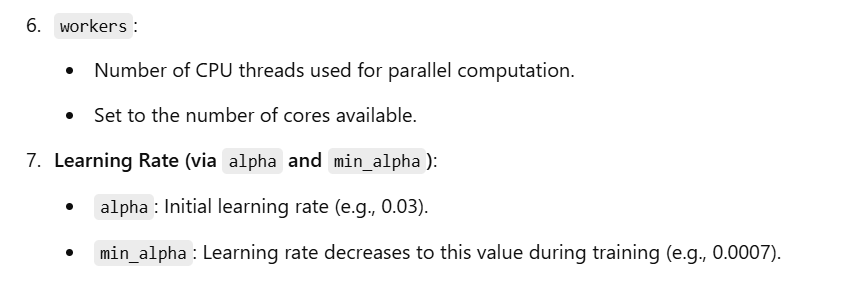